
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 19: ML (Comparative Analysis of Clustering Techniques Across Datasets)🔍🧩🤖**</h1>
</div>


To understand the applicability and effectiveness of different clustering algorithms (K-Means and Hierarchical Clustering) across various datasets, and to explore how the nature of the data influences clustering outcomes and interpretations.


**Deadline: 2 August 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Task Description: 🔍🧩**


## **[Wholesale Customers Dataset](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)**

## **[Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)**

## 1. **Dataset Selection and Initial Analysis:**

**Steps:**
- Step 1: Choose two datasets from the list provided (Iris, Mall Customers, Wholesale Customers).
- Step 2: Conduct an initial exploratory data analysis (EDA) for each dataset to understand its characteristics, including data distribution, feature correlations, and potential outliers.

---

## 2. **Implementing Clustering Algorithms:**

**Steps:**
- Step 3: Apply K-Means clustering to both datasets. Determine the optimal number of clusters using methods such as the Elbow Method and Silhouette Score.
- Step 4: Apply Hierarchical Clustering to both datasets, choosing an appropriate linkage criterion (e.g., single, complete, average) and visualizing the dendrogram to determine the number of clusters.

---

## 3. **Cluster Visualization and Interpretation:**

**Steps:**
- Step 5: Visualize the clusters obtained from both K-Means and Hierarchical Clustering. Use dimensionality reduction techniques like PCA or t-SNE to help in visualizing the clusters, if necessary.
- Step 6: Compare the clustering results qualitatively (e.g., cluster compactness, separation) and quantitatively (e.g., Silhouette Score, Davies-Bouldin Index).

---

## 4. **Exploratory Analysis and Insights:**

**Steps:**
- Step 7: Analyze the clusters in the context of the original features. For each dataset, interpret the clusters to identify any patterns or insights (e.g., customer segments, species differentiation).
- Step 8: Explore the impact of different clustering parameters (e.g., number of clusters in K-Means, linkage criteria in Hierarchical Clustering) on the results.


---

## 5. **Comparison and Reporting:**

**Steps:**
- Step 9: Compare the effectiveness of K-Means and Hierarchical Clustering across the two datasets. Discuss which algorithm performed better for each dataset and why, considering factors such as data distribution and feature space.
- Step 10: Prepare a comprehensive Article summarizing the findings, including visualizations, cluster interpretations, and a comparative analysis of the clustering techniques used.


---

## **Let's get started!**

## Import Dependencies

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch  # For creating dendrogram
from sklearn.cluster import AgglomerativeClustering  # For hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances_argmin_min
from scipy.spatial.distance import cdist

plt.figure(figsize=(10, 7))
import warnings
warnings.filterwarnings('ignore')

<Figure size 1000x700 with 0 Axes>

In [67]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Dataset Selection and Initial Analysis

### Step 1: Choose Two Datasets

Let's choose the Mall Customers and Wholesale Customers datasets.

In [68]:
# Load the Wholesale Customers dataset
path1='/content/drive/MyDrive/dataset/Mall_Customers.csv'
path2='/content/drive/MyDrive/dataset/Wholesale customers data.csv'
mall = pd.read_csv(path1)
wholesale = pd.read_csv(path2)

### Step 2: Conduct an initial exploratory data analysis (EDA) for each dataset

 To understand its characteristics, including data distribution, feature correlations, and potential outliers.

In [69]:
mall.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [70]:
wholesale.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Basic Statistics
                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  




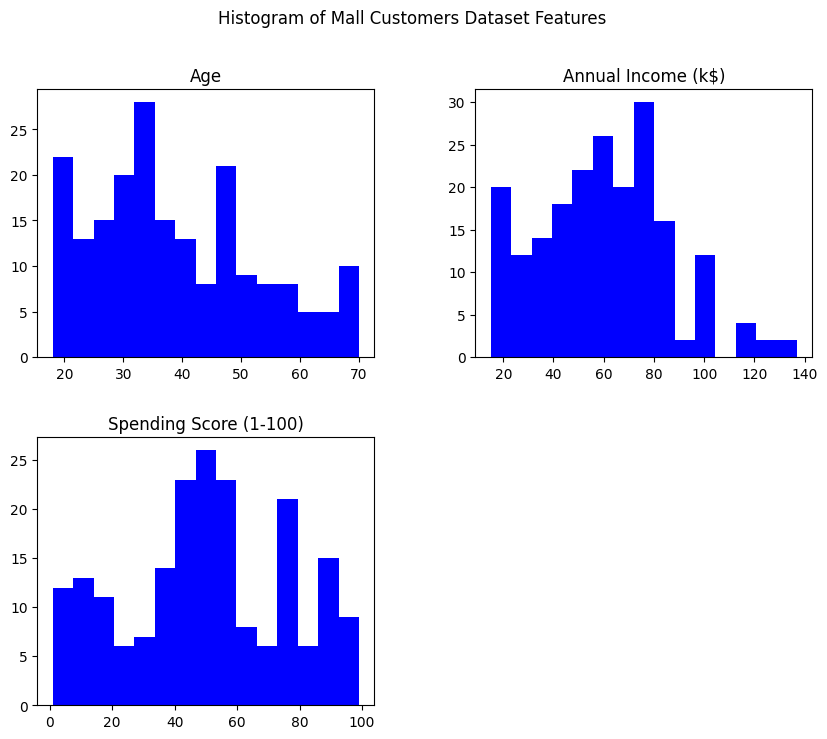

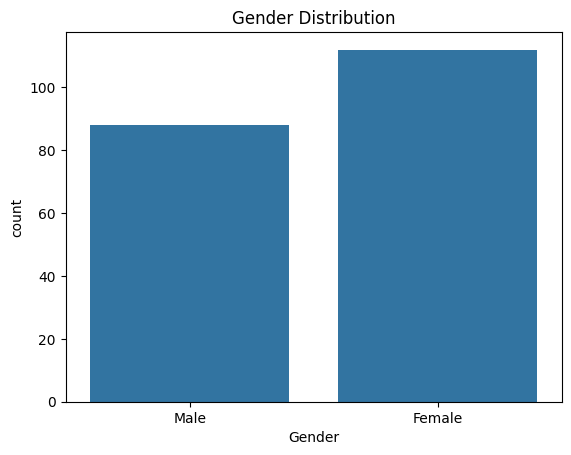

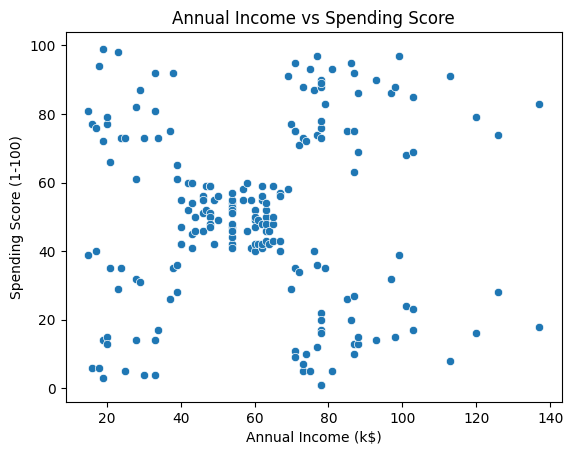

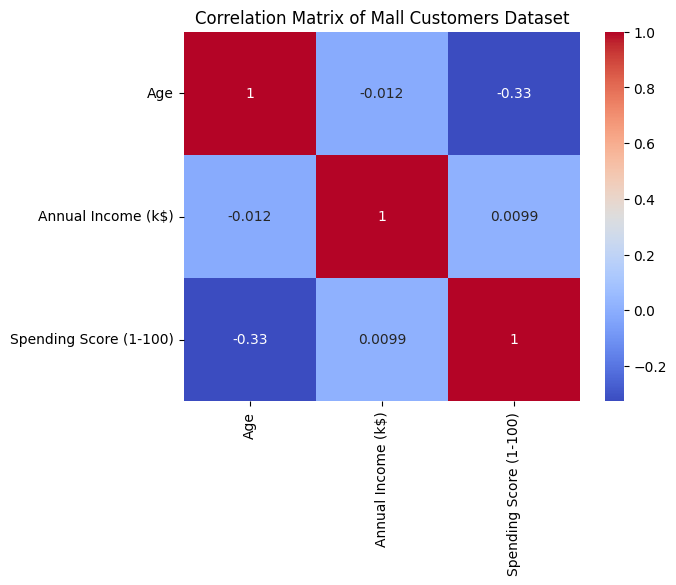

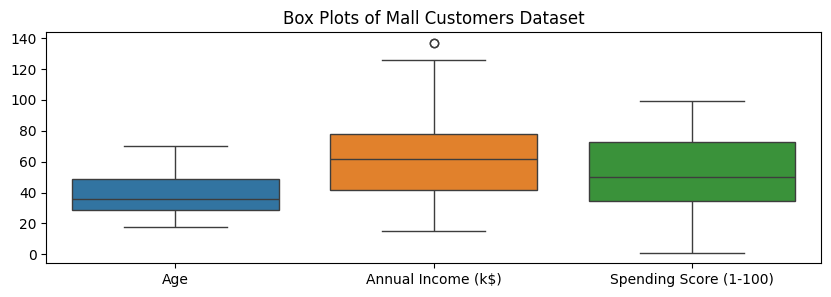

In [71]:
# Initial EDA for Mall Customers dataset

# Basic Stats
print('Basic Statistics')
print(mall.describe().T)
print('\n')

# Plot the distribution of features
mall[['Age', 'Annual Income (k$)','Spending Score (1-100)']].hist(bins=15, figsize=(10, 8), grid=False, color='b')
plt.suptitle("Histogram of Mall Customers Dataset Features")
plt.show()
print('\n')

# Count plot for Gender
sns.countplot(x='Gender', data=mall)
plt.title('Gender Distribution')
plt.show()
print('\n')

# Visualize relationships between features (Annual Income vs Spending Score)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall)
plt.title("Annual Income vs Spending Score")
plt.show()
print('\n')

# Compute and display the correlation matrix
correlation_matrix = mall[[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Mall Customers Dataset")
plt.show()
print('\n')

# Box plots to check for outliers
plt.figure(figsize=(10, 3))
sns.boxplot(data=mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Box Plots of Mall Customers Dataset")
plt.show()

In [72]:
# Stats
mall.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')
    # .background_gradient(subset=['min'], cmap='PuBu').background_gradient(subset=['max'], cmap='PuBu')

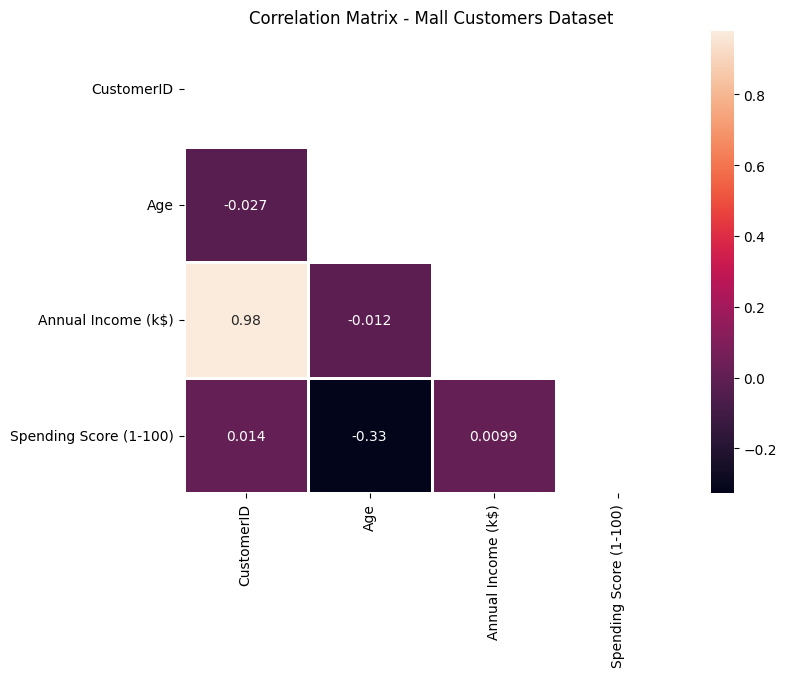

In [73]:
# Corr
matrix = np.triu(mall.drop('Gender', axis=1).corr())  # Drop the Gender column for correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(mall.drop('Gender', axis=1).corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket"); # Drop the Gender column
plt.title('Correlation Matrix - Mall Customers Dataset')
plt.show()

Basic Statistics
                  count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Channel               2.00       2.0  
Region                3.00       3.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Deterge

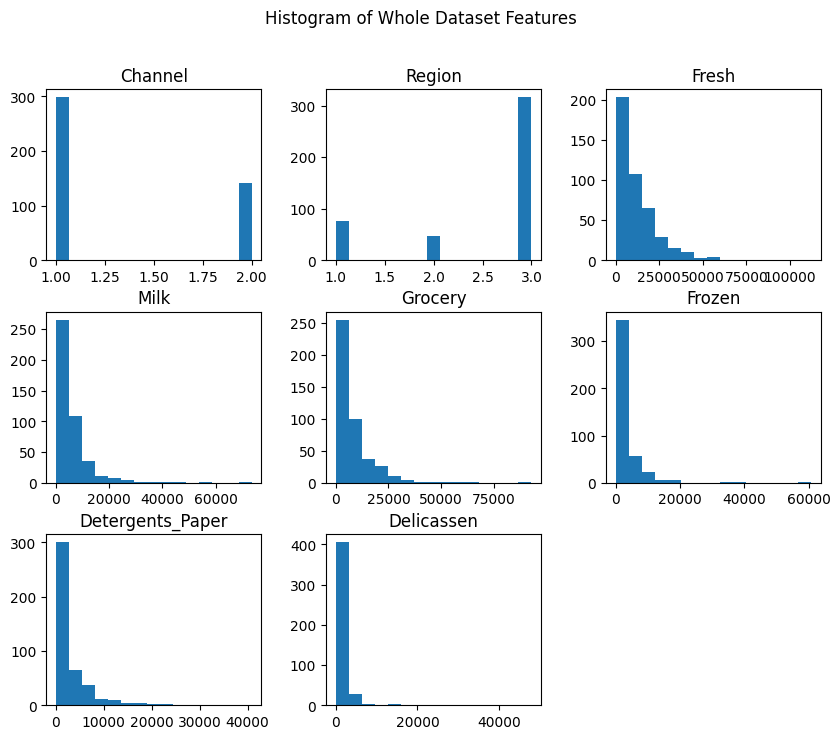

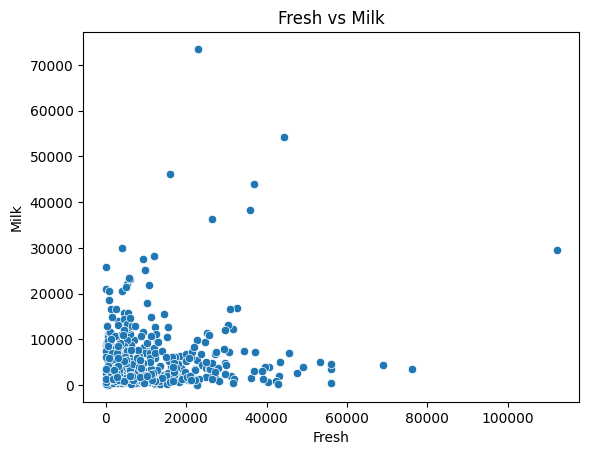

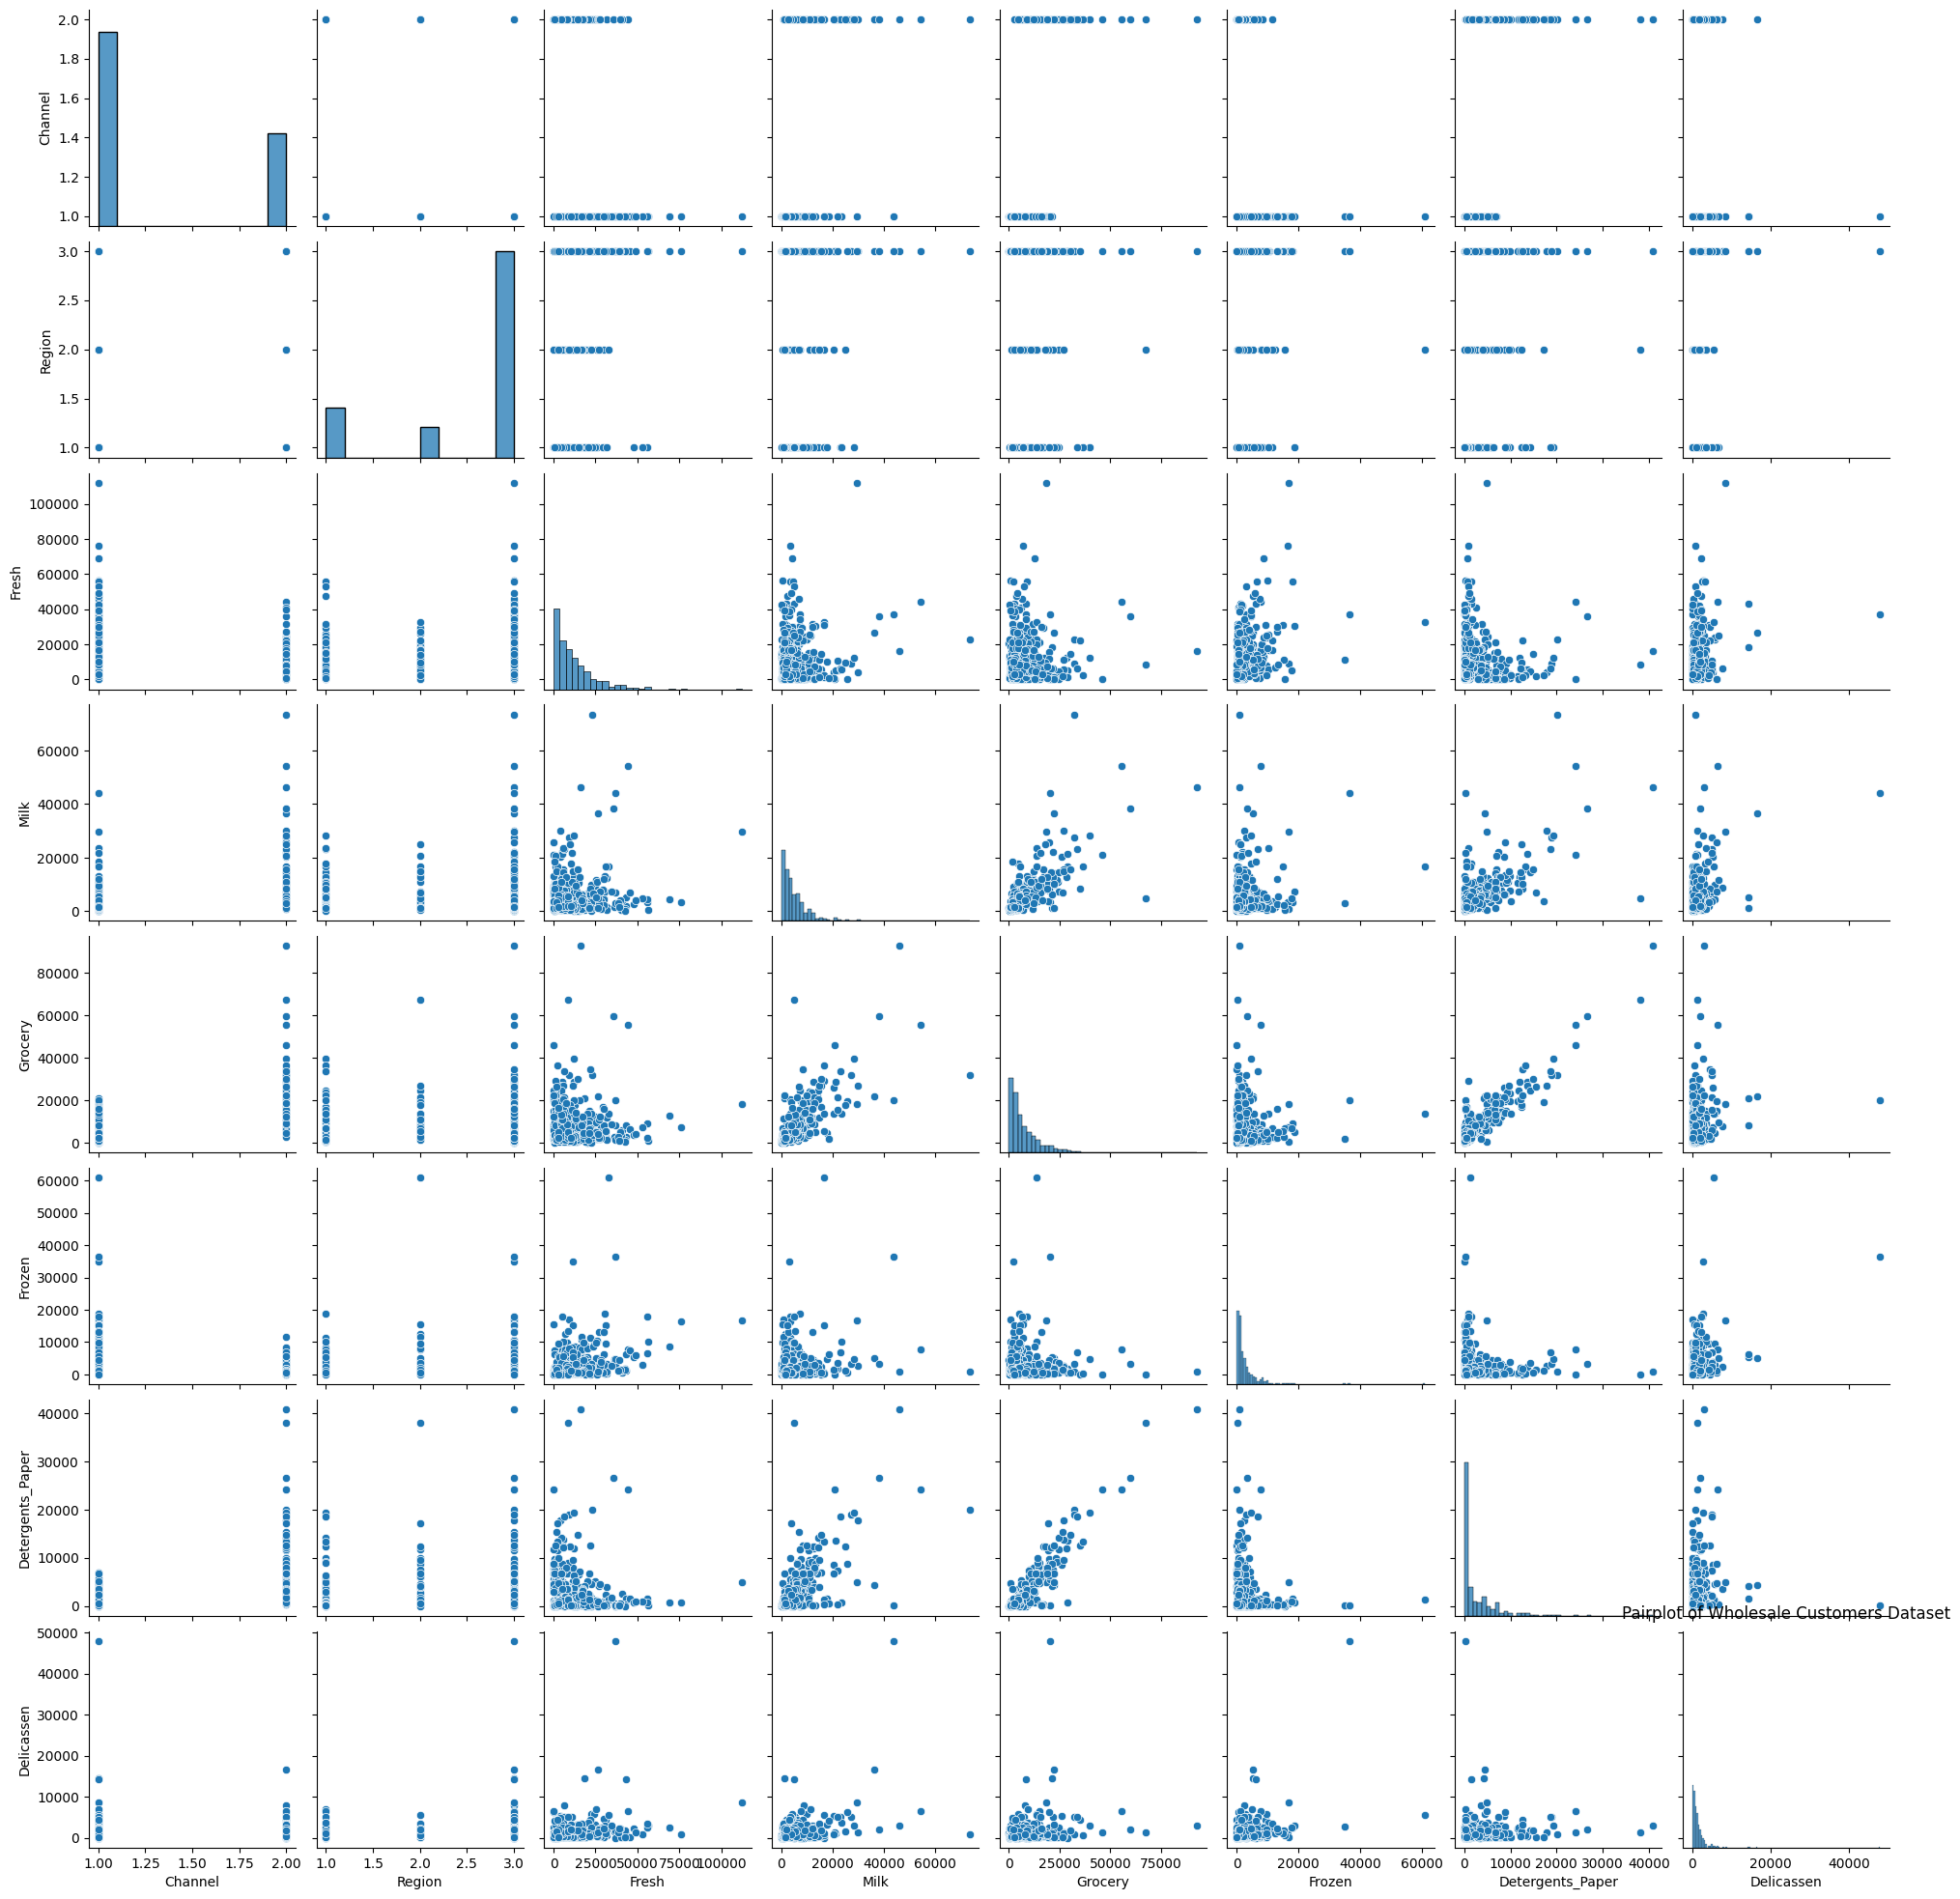

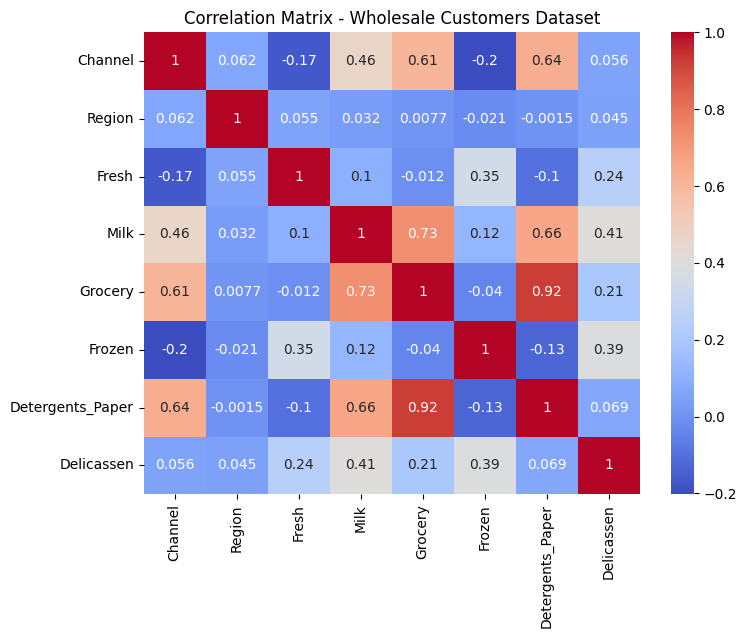

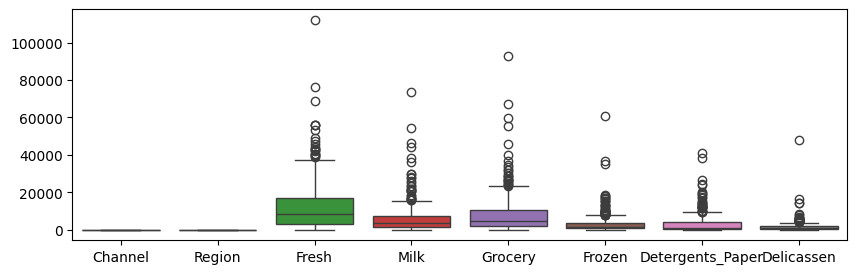

In [74]:
# Initial EDA for Wholesale Customers dataset

# Basic Stats
print('Basic Statistics')
print(wholesale.describe().T)
print('\n')

# Plot the distribution of features
wholesale[['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']].hist(bins=15, figsize=(10, 8), grid=False)
plt.suptitle("Histogram of Whole Dataset Features")
plt.show()
print('\n')

# Visualize relationships between features
sns.scatterplot(x='Fresh', y='Milk', data=wholesale)
plt.title("Fresh vs Milk")
plt.show()
print('\n')

# Pair plot to explore relationships between features
sns.pairplot(wholesale)
plt.title('Pairplot of Wholesale Customers Dataset',y=1.02)
plt.show()
print('\n')

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wholesale.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Wholesale Customers Dataset')
plt.show()
print('\n')

# Box plots to check for outliers
plt.figure(figsize=(10, 3))
sns.boxplot(data=wholesale[['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']])
plt.show()
print('\n')

In [75]:
# Stats
cols = ['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']
wholesale[cols].describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')
    # .background_gradient(subset=['min'], cmap='PuBu').background_gradient(subset=['max'], cmap='PuBu')

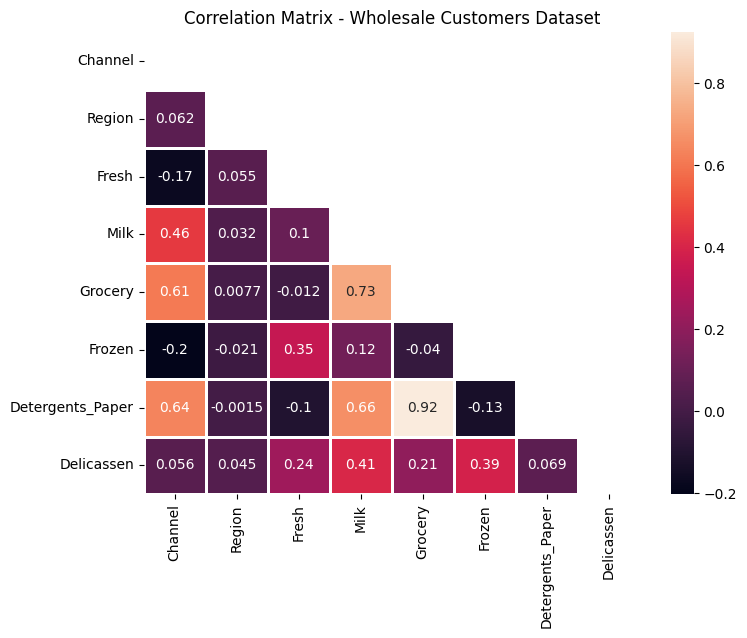

In [76]:
# Corr
matrix = np.triu(wholesale.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(wholesale.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");
plt.title('Correlation Matrix - Wholesale Customers Dataset')
plt.show()

## 2. Implementing Clustering Algorithms


### Step 3: Apply K-Means Clustering


In [77]:
# Data Preprocessing:

# Selecting the features for clustering
X_mall = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_mall_scaled = scaler.fit_transform(X_mall)

# Selecting the features for clustering
wholesale = wholesale[['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']]

# Normalizing the data
scaler = StandardScaler()
X_wholesale_scaled = scaler.fit_transform(wholesale)

In [78]:
# Function to determine the optimal number of clusters using Elbow Method

def plot_elbow_method(data, dataset_name, max_clusters=10):
    wcss = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plottingg the Elbow Method
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), wcss, 'bx-', marker='o',)  # k
    plt.title(f'Elbow Method - {dataset_name} Dataset')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

      # Manual or Heuristic Selection
      # Ask the user to visually determine the optimal number of clusters from the plot
      # Find the automated "elbow" point (optional: manually or using a threshold/heuristic)
    # Find the point where the reduction in WCSS slows down (elbow point)
    diff_wcss = np.diff(wcss)  # first derivative of WCSS
    elbow_point = np.argmin(diff_wcss) + 2  # +2 because of zero-indexing
    print(f"\nSuggested optimal number of clusters (elbow point): {elbow_point}\n")

    return elbow_point
    # return wcss

In [79]:
# Function to calculate and plot silhouette scores for different cluster numbers
def plot_silhouette_scores(data, dataset_name, min_clusters=2, max_clusters=10):
    sil_scores = []

    for k in range(min_clusters, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        sil_score = silhouette_score(data, clusters)
        sil_scores.append(sil_score)
        print(f'Silhouette Score for {k} clusters: {sil_score}')

    # Plotting Silhouette Scores
    plt.figure(figsize=(8, 4))
    plt.plot(range(min_clusters, max_clusters+1), sil_scores, marker='o')
    plt.title(f'Silhouette Scores - {dataset_name} Dataset')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    return sil_scores

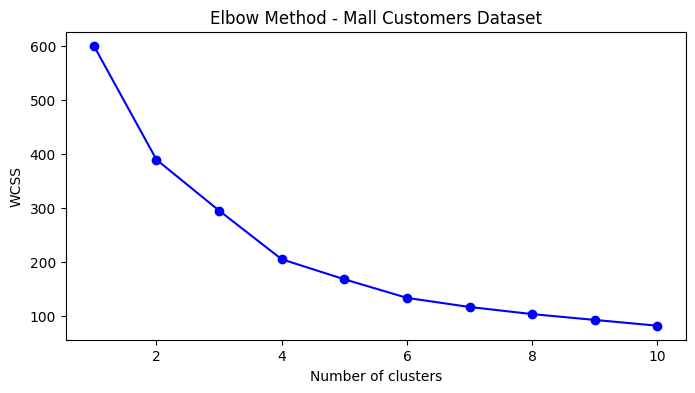


Suggested optimal number of clusters (elbow point): 2

Silhouette Score for 2 clusters: 0.33547192894004574
Silhouette Score for 3 clusters: 0.357793388710272
Silhouette Score for 4 clusters: 0.4039582785148566
Silhouette Score for 5 clusters: 0.41664341513732767
Silhouette Score for 6 clusters: 0.4284167762892593
Silhouette Score for 7 clusters: 0.417231894954916
Silhouette Score for 8 clusters: 0.4082067042807375
Silhouette Score for 9 clusters: 0.41769250624076476
Silhouette Score for 10 clusters: 0.40655411010117015


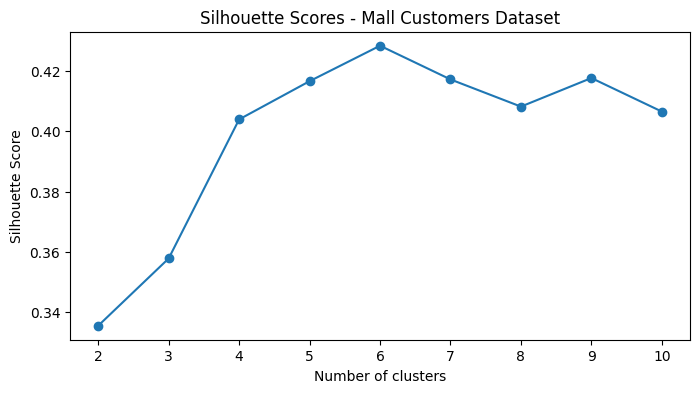

Silhouette_scores [0.33547192894004574, 0.357793388710272, 0.4039582785148566, 0.41664341513732767, 0.4284167762892593, 0.417231894954916, 0.4082067042807375, 0.41769250624076476, 0.40655411010117015]


In [80]:
# Mall Customers Dataset - K-Means:

# Elbow Method
optimal_clusters = plot_elbow_method(X_mall_scaled, 'Mall Customers')
# print('Optimal Clusters',optimal_clusters)

# Silhouette Score
silhouette_scores = plot_silhouette_scores(X_mall_scaled, 'Mall Customers')
print('Silhouette_scores',silhouette_scores)   # Silhouette Scores for each cluster

In [81]:
# Applying K-Means with the determined optimal clusters
optimal_clusters=4
kmeans_mall = KMeans(n_clusters=optimal_clusters, random_state=42)
mall_kmeans_labels = kmeans_mall.fit_predict(X_mall_scaled)

# Converting the scaled data back to a DataFrame with original column names
X_mall_scaled = pd.DataFrame(X_mall_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
# Adding the cluster labels to the original DataFrame
X_mall_scaled['KMeans_Cluster'] = mall_kmeans_labels

# Display the first few rows with the cluster labels
print('\n')
display(X_mall_scaled.head(5))
print('\n')

# Calculate and print the Silhouette Score for the entire dataset
silhouette_avg_mall = silhouette_score(X_mall_scaled, X_mall_scaled['KMeans_Cluster'])
print(f'Silhouette Score for Mall Customers (K-Means): {silhouette_avg_mall}')

Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
0 -1.424569           -1.738999               -0.434801               2
1 -1.281035           -1.738999                1.195704               2
2 -1.352802           -1.700830               -1.715913               2
3 -1.137502           -1.700830                1.040418               2
4 -0.563369           -1.662660               -0.395980               2



Silhouette Score for Mall Customers (K-Means): 0.5162587824632527


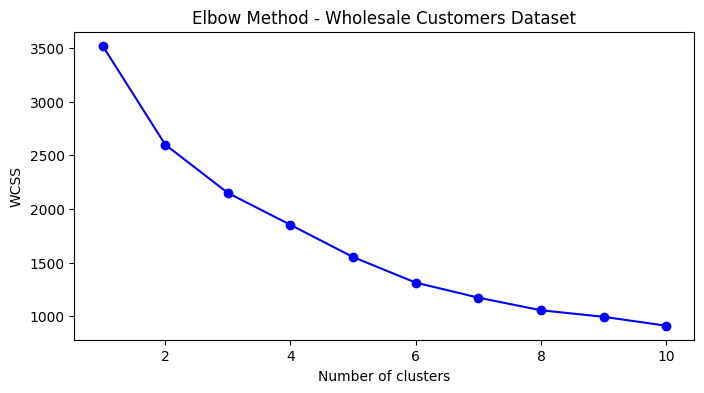


Suggested optimal number of clusters (elbow point): 2

Silhouette Score for 2 clusters: 0.3733740311185568
Silhouette Score for 3 clusters: 0.3567685389017652
Silhouette Score for 4 clusters: 0.34819485747460033
Silhouette Score for 5 clusters: 0.35292393966569646
Silhouette Score for 6 clusters: 0.3525837344718669
Silhouette Score for 7 clusters: 0.3638318723917674
Silhouette Score for 8 clusters: 0.37426467849449924
Silhouette Score for 9 clusters: 0.30805486690009953
Silhouette Score for 10 clusters: 0.33097936871066486


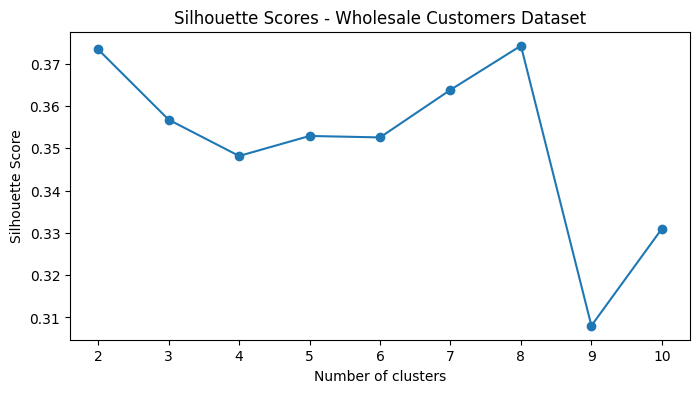

Silhouette_scores [0.3733740311185568, 0.3567685389017652, 0.34819485747460033, 0.35292393966569646, 0.3525837344718669, 0.3638318723917674, 0.37426467849449924, 0.30805486690009953, 0.33097936871066486]


In [82]:
# Wholesale Customers Dataset - K-Means:

# Elbow Method
optimal_clusters = plot_elbow_method(X_wholesale_scaled, 'Wholesale Customers')

# Silhouette Score
silhouette_scores = plot_silhouette_scores(X_wholesale_scaled, 'Wholesale Customers')
print('Silhouette_scores',silhouette_scores)   # Silhouette Scores for each cluster

In [83]:
# Applying K-Means with the determined optimal clusters
optimal_clusters = 2
kmeans_wholesale = KMeans(n_clusters=optimal_clusters, random_state=42)
X_wholesale_scaled = pd.DataFrame(X_wholesale_scaled, columns=['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'])
X_wholesale_scaled['KMeans_Cluster'] = kmeans_wholesale.fit_predict(X_wholesale_scaled)

# Display the first few rows with the cluster labels
print('\n')
display(X_wholesale_scaled.head(5))
print('\n')

# Calculate and print the Silhouette Score for the entire dataset
silhouette_avg_wholesale = silhouette_score(X_wholesale_scaled, X_wholesale_scaled['KMeans_Cluster'])
print(f'Silhouette Score for Wholesale Customers (K-Means): {silhouette_avg_wholesale}')

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  KMeans_Cluster  
0         -0.043569   -0.066339               1  
1          0.086407    0.089151               1  
2          0.133232    2.243293               1  
3         -0.498588    0.093411               0  
4         -0.231918    1.299347               1



Silhouette Score for Wholesale Customers (K-Means): 0.3941162849247617


### Step 4: Apply Hierarchical Clustering


In [84]:
# Data Preprocessing:

# Selecting the features for clustering
X_mall_0 = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_mall_scaled_0 = scaler.fit_transform(X_mall_0)

# Selecting the features for clustering
wholesale_0 = wholesale[['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']]

# Normalizing the data
scaler = StandardScaler()
X_wholesale_scaled_0 = scaler.fit_transform(wholesale_0)

In [85]:
# Function to plot dendrogram
def plot_dendrogram(data, method='ward'):
    Z = linkage(data, method=method)
    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram")
    dendrogram(Z)
    # dendrogram(Z, truncate_mode='level', p=3)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

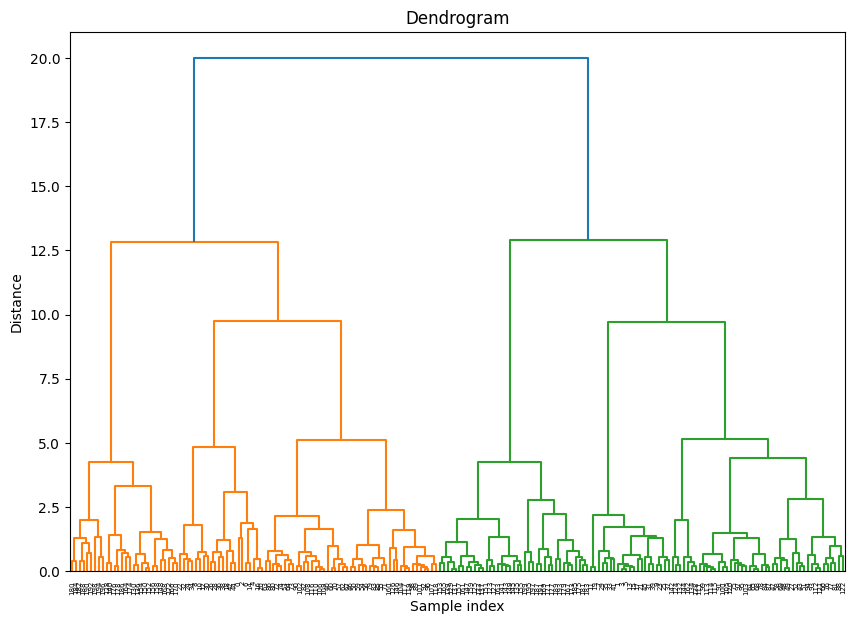

In [86]:
# Mall Customers Dataset - Hierarchical Clustering:

plot_dendrogram(X_mall_scaled_0)

In [87]:
X_mall_scaled_0 = pd.DataFrame(X_mall_scaled_0, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

Z = linkage(X_mall_scaled_0, method='ward')
X_mall_scaled_0['hierarchical_cluster'] = fcluster(Z, 2, criterion='maxclust')
X_mall_scaled_0.head(5)

Age  Annual Income (k$)  Spending Score (1-100)  hierarchical_cluster
0 -1.424569           -1.738999               -0.434801                     1
1 -1.281035           -1.738999                1.195704                     2
2 -1.352802           -1.700830               -1.715913                     1
3 -1.137502           -1.700830                1.040418                     2
4 -0.563369           -1.662660               -0.395980                     1

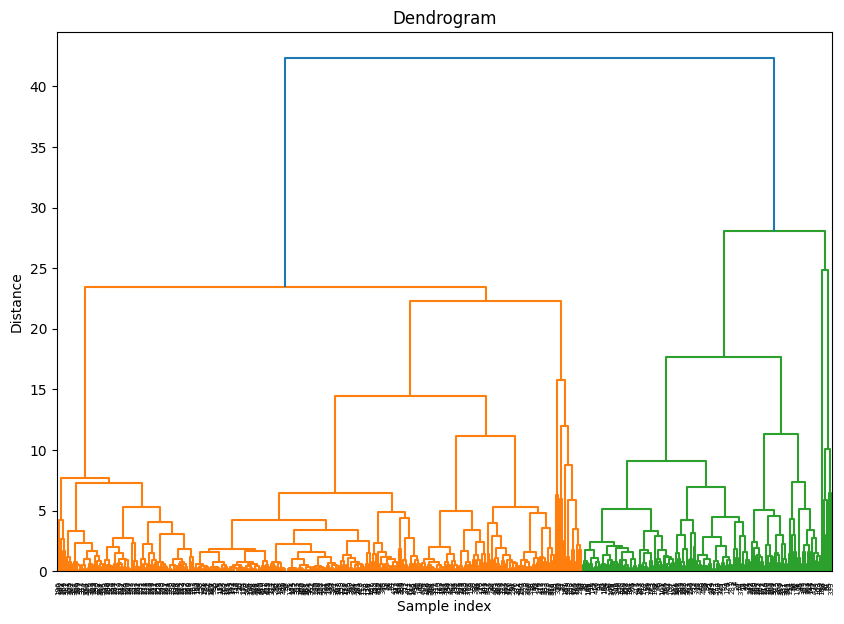

In [88]:
# Wholesale Customers Dataset - Hierarchical Clustering:

# Performing hierarchical clustering
plot_dendrogram(X_wholesale_scaled_0)

In [89]:
X_wholesale_scaled_0 = pd.DataFrame(X_wholesale_scaled_0, columns=['Channel',	'Region',	'Fresh','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'])
Z = linkage(X_wholesale_scaled_0, method='ward')
X_wholesale_scaled_0['hierarchical_cluster'] = fcluster(Z, 2, criterion='maxclust')
X_wholesale_scaled_0.head(5)

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  hierarchical_cluster  
0         -0.043569   -0.066339                     2  
1          0.086407    0.089151                     2  
2          0.133232    2.243293                     2  
3         -0.498588    0.093411                     1  
4         -0.231918    1.299347                     2

In [90]:
# Applying Agglomerative Clustering

# hierarchical_wholesale = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# X_wholesale_scaled_0['Hierarchical_Cluster'] = hierarchical_wholesale.fit_predict(X_wholesale_scaled_0)
# X_wholesale_scaled_0.head()

## 3. Cluster Visualization and Interpretation


In [91]:
# =================

# Pie Chart Visualization
def plot_pie_chart(dataset, column_name):
    values = dataset[column_name].value_counts()
    labels = dataset[column_name].unique()

    fig, ax = plt.subplots(figsize=[9, 6])
    patches, texts, autotexts = ax.pie(
        values,
        labels=labels,
        autopct='%1.2f%%',
        shadow=True,
        pctdistance=0.5
        # explode=[0.06]*dataset['Cluster'].unique()
    )

    plt.legend(patches, labels, loc="best")
    plt.title(column_name, color='white', fontsize=15)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

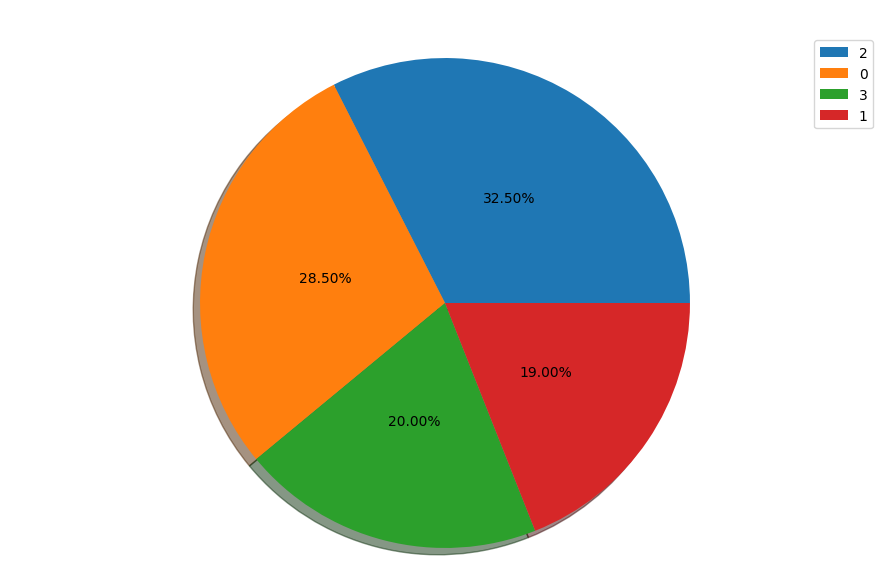

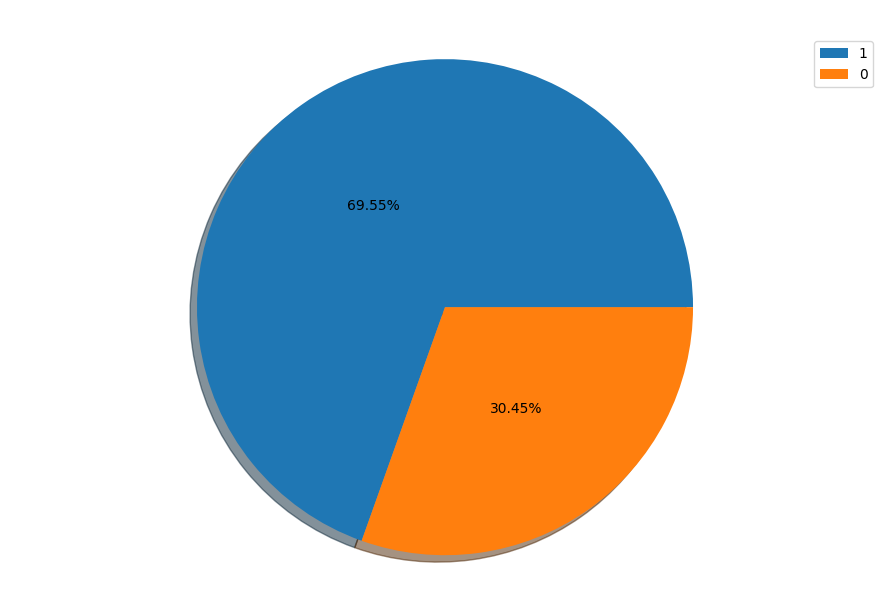

In [92]:
# For KMeans clusters
plot_pie_chart(X_mall_scaled, 'KMeans_Cluster')
plot_pie_chart(X_wholesale_scaled, 'KMeans_Cluster')

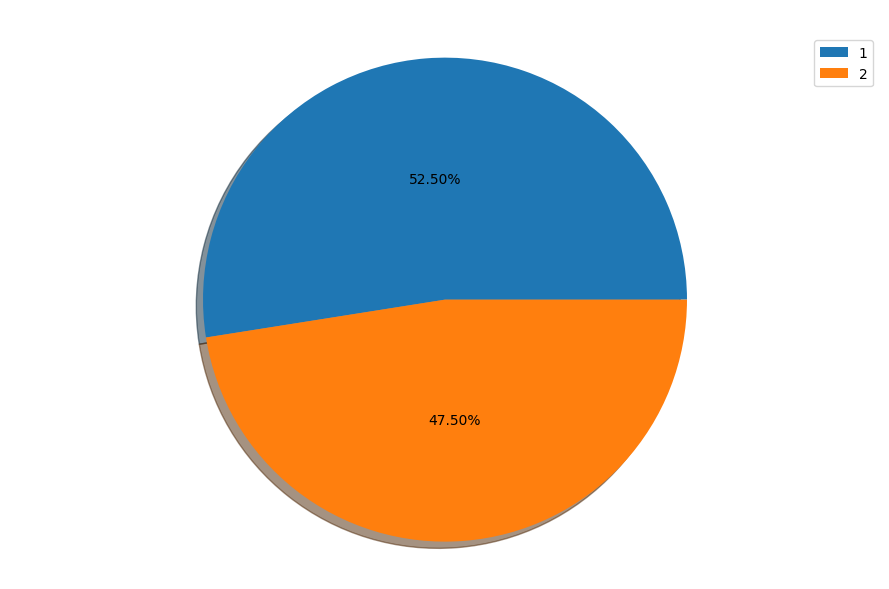

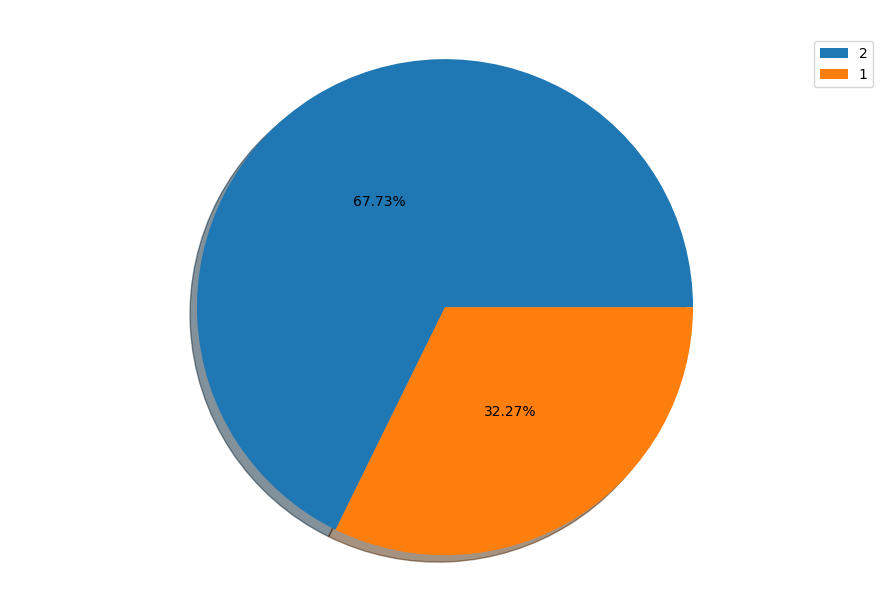

In [93]:
# For Hierarchical clusters
plot_pie_chart(X_mall_scaled_0, 'hierarchical_cluster')
plot_pie_chart(X_wholesale_scaled_0, 'hierarchical_cluster')

### Step 5: Visualize the Clusters using PCA/t-SNE






In [94]:
# Function to Visualize Clusters Using PCA
def plot_clusters(data, labels, title, n=2):
  # Applying PCA to reduce the dataset to n dimensions
    pca = PCA(n_components=n)
    components = pca.fit_transform(data)
    plt.figure(figsize=(10, 7))
    scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette='viridis',edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    # plt.colorbar(label='Cluster Label')
    plt.colorbar(scatter.collections[0], label='Cluster Label')  # scatterplot output to create the colorbar
    plt.tight_layout()
    plt.show()

In [95]:
# PCA for Mall Customers & Wholesale Customers dataset
k_mall_pca = X_mall_scaled.drop(columns=['KMeans_Cluster',]).copy()
h_mall_pca = X_mall_scaled_0.drop(columns=['hierarchical_cluster',]).copy()
k_wholesale_pca = X_wholesale_scaled.drop(columns=['KMeans_Cluster',]).copy()
h_wholesale_pca = X_wholesale_scaled_0.drop(columns=['hierarchical_cluster',]).copy()

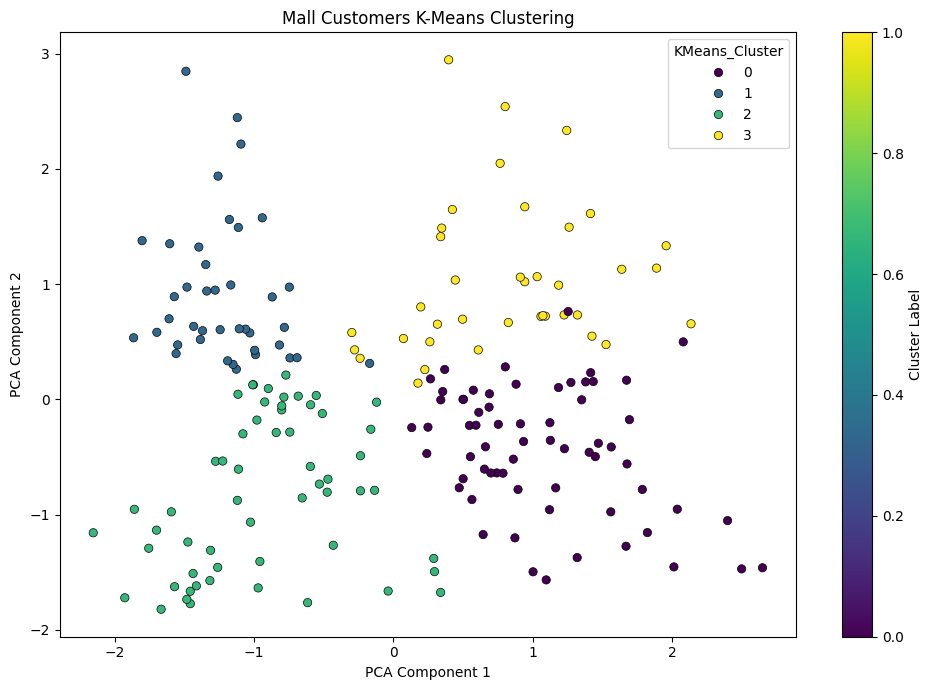

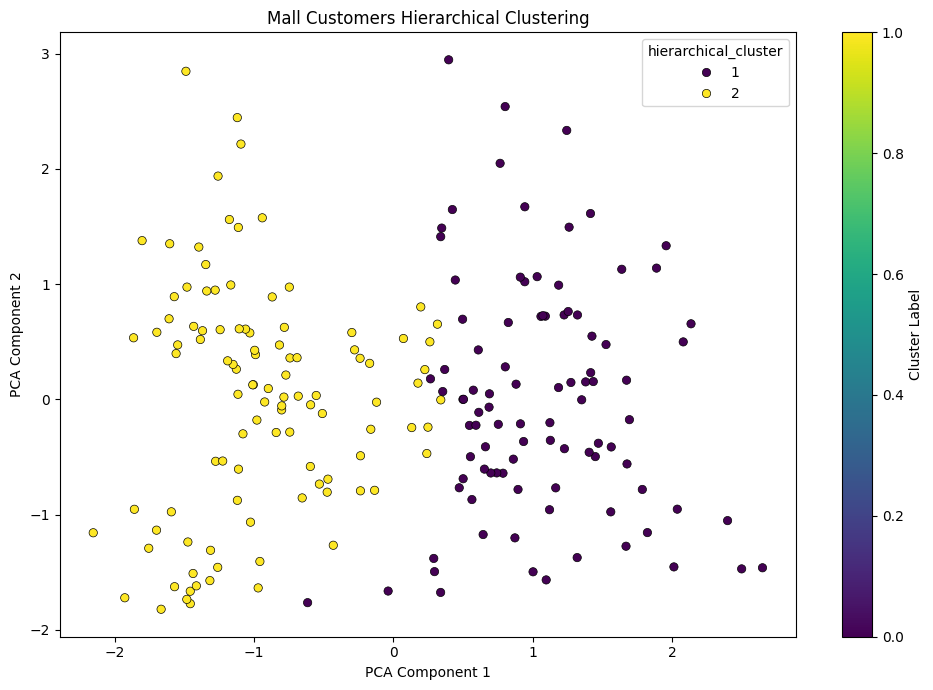

In [96]:
# Mall Customers Dataset Visualization

# plot_clusters(k_mall_pca, k_mall_pca['KMeans_Cluster'], 'Mall Customers K-Means Clustering')
plot_clusters(k_mall_pca, X_mall_scaled['KMeans_Cluster'], 'Mall Customers K-Means Clustering')
plot_clusters(h_mall_pca, X_mall_scaled_0['hierarchical_cluster'], 'Mall Customers Hierarchical Clustering', n=2)

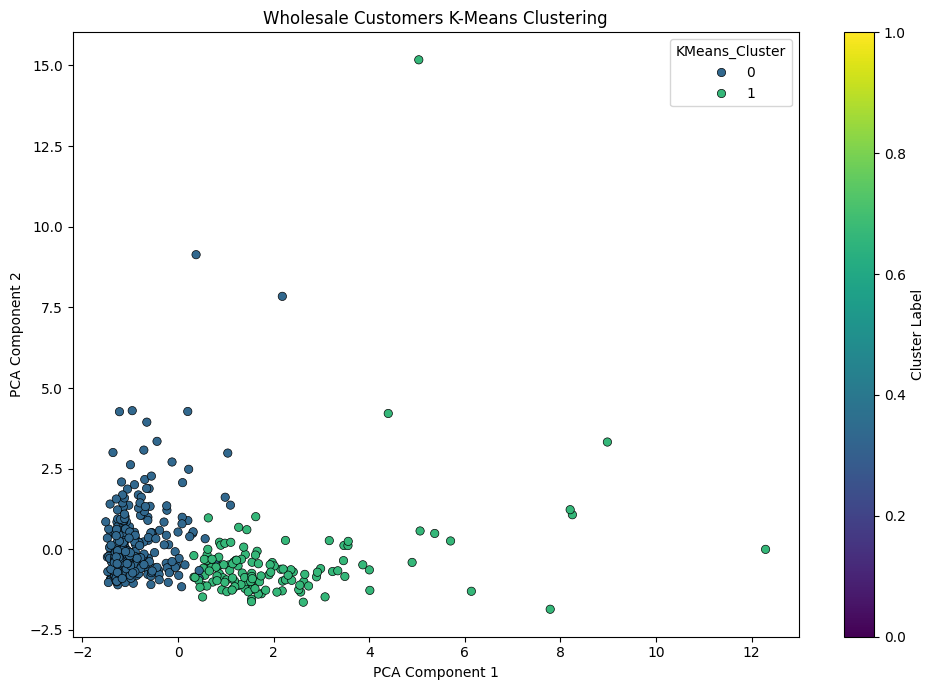

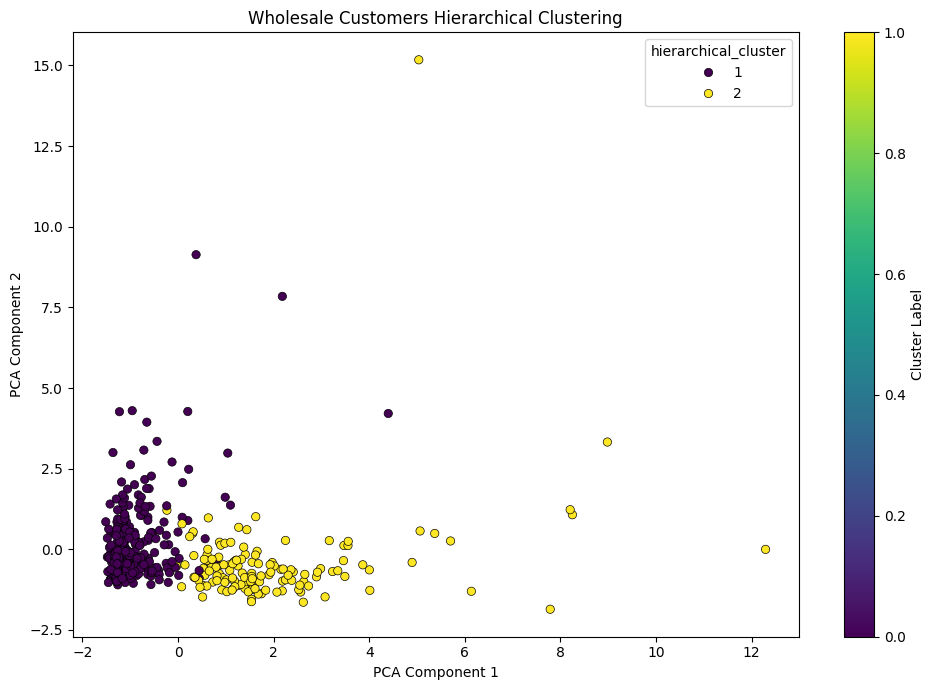

In [97]:
# Wholesale Customers Dataset Visualization
plot_clusters(k_wholesale_pca, X_wholesale_scaled['KMeans_Cluster'], 'Wholesale Customers K-Means Clustering')
plot_clusters(h_wholesale_pca, X_wholesale_scaled_0['hierarchical_cluster'], 'Wholesale Customers Hierarchical Clustering')

### Step 6: Qualitative and Quantitative Comparison

To compare the clustering results qualitatively and quantitatively for both the Mall Customers and Wholesale Customers datasets, we can use the these approaches:



#### 1. Quantitative Comparison (Cluster compactness, Separation))

**Cluster Compactness and Separation:**

- Mall Customers:

  The clusters are well-separated, with a clear boundary between the two clusters (purple and yellow). The points within each cluster seem compact.

- Wholesale Customers:

  There is more overlap between the clusters, especially in the lower range. Some points, especially in the yellow cluster, are spread far apart, suggesting less compactness in this clustering solution compared to the Mall Customers.


#### 2. Quantitative Comparison (Silhouette Score, Davies-Bouldin Index):

We can compute two important metrics to evaluate clustering performance:

>***Silhouette Score:*** Measures how similar an object is to its own cluster (compactness) compared to other clusters (separation).
- It ranges from -1 (incorrect clustering) to +1 (high compactness and separation).
- A score close to +1 means the object is well matched to its own cluster and poorly matched to neighboring clusters (indicating compact and well-separated clusters).
- A score near 0 indicates overlapping clusters.
- A negative score means points are likely in the wrong cluster.
- So the clustering method with the higher Silhouette Score is generally considered to have more compact and well-separated clusters.

>***Davies-Bouldin Index:*** Evaluates the average similarity ratio of each cluster with respect to its most similar cluster.
- It takes into account both cluster compactness and separation. Lower Davies-Bouldin scores represent better clustering (more compact and well-separated clusters).
- So the clustering method with the lower Davies-Bouldin Index suggests better clustering, as the clusters are more distinct and internally coherent.

***Note:*** K-Means typically results in more compact clusters when the dataset has a clear spherical shape and well-separated clusters.
Hierarchical Clustering may be better for datasets that have varying shapes of clusters and are not necessarily spherical.



In [98]:
# Function to calculate clustering metrics
def clustering_metrics(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    return silhouette_avg, db_index

def calculate_and_display_metrics(X_scaled, cluster_labels, dataset_name):
    """Calculate and display clustering metrics for a given dataset."""
    silhouette_score, davies_bouldin_index = clustering_metrics(X_scaled, cluster_labels)
    print(f'{dataset_name} Clustering Metrics:\n'
          f'- Silhouette Score: {silhouette_score:.4f}\n'
          f'- Davies-Bouldin Index: {davies_bouldin_index:.4f}\n')

In [99]:
# Mall Customers Dataset Metrics
print('Mall Customers Dataset:\n')
calculate_and_display_metrics(X_mall_scaled, X_mall_scaled['KMeans_Cluster'], 'K-Means')
calculate_and_display_metrics(X_mall_scaled_0, X_mall_scaled_0['hierarchical_cluster'], 'Hierarchical')

# Wholesale Customers Dataset Metrics
print('\nWholesale Customers Dataset:\n')
calculate_and_display_metrics(X_wholesale_scaled, X_wholesale_scaled['KMeans_Cluster'], 'K-Means')
calculate_and_display_metrics(X_wholesale_scaled_0, X_wholesale_scaled_0['hierarchical_cluster'], 'Hierarchical')

Mall Customers Dataset:

K-Means Clustering Metrics:
- Silhouette Score: 0.5163
- Davies-Bouldin Index: 0.7136

Hierarchical Clustering Metrics:
- Silhouette Score: 0.3686
- Davies-Bouldin Index: 1.1705


Wholesale Customers Dataset:

K-Means Clustering Metrics:
- Silhouette Score: 0.3941
- Davies-Bouldin Index: 1.1989

Hierarchical Clustering Metrics:
- Silhouette Score: 0.3890
- Davies-Bouldin Index: 1.2211




---

**Mall Customers Dataset:**

- **K-Means Clustering Metrics:**
  - **Silhouette Score**: 0.5163 (indicating reasonably good clustering with moderate separation between clusters)
  - **Davies-Bouldin Index**: 0.7136 (a relatively low value suggesting good clustering quality with distinct clusters)

- **Hierarchical Clustering Metrics:**
  - **Silhouette Score**: 0.3686 (lower than K-Means, indicating weaker cluster separation)
  - **Davies-Bouldin Index**: 1.1705 (higher than K-Means, suggesting more similarity between clusters)

---

 **Wholesale Customers Dataset:**

- **K-Means Clustering Metrics:**
  - **Silhouette Score**: 0.3941 (indicating moderately weak clustering with some separation between clusters)
  - **Davies-Bouldin Index**: 1.1989 (suggesting weak clustering with significant overlap between clusters)

- **Hierarchical Clustering Metrics:**
  - **Silhouette Score**: 0.3890 (similar to K-Means, indicating weak cluster separation)
  - **Davies-Bouldin Index**: 1.2211 (slightly higher than K-Means, indicating poor clustering quality with high similarity between clusters)

---

**Conclusion:**

In both datasets, K-Means generally performs better, especially in the Mall Customers dataset, where it shows a notable improvement over Hierarchical Clustering. However, the performance difference is smaller in the Wholesale Customers dataset.




>Note:
  - The higher the Silhouette Score, the better the clusters are.
  - The lower the Davies-Bouldin Index, the better the clusters are.

## 4. Exploratory Analysis and Insights


### Step 7: Analyze the clusters in the context of the original features.

To analyze and interpret the clusters  by looking at their original feature values, we can examine the average or distribution of the original feature values within each cluster.

This helps interpret how different clusters are characterized by specific feature patterns.



In [100]:
# Summary Statistics per Cluster:

# 1. Compute the mean values of features for each K-Means cluster

# Mall Customers Dataset + Wholesale Customers Dataset
cluster_summary = X_mall_scaled.groupby('KMeans_Cluster').mean()
print("Mall Customers Cluster Summary (Kmeans):")
display(cluster_summary)
print('\n')
cluster_summary = X_wholesale_scaled.groupby('KMeans_Cluster').mean()
print("Wholesale Customers Cluster Summary (Kmeans):")
display(cluster_summary)

# 2. Compute the mean values of features for each Hierarchical cluster

# Mall Customers Dataset + Wholesale Customers Dataset
cluster_summary = X_mall_scaled_0.groupby('hierarchical_cluster').mean()
print("\nMall Customers Cluster Summary (Hierarchical):")
display(cluster_summary)
print('\n')
cluster_summary = X_wholesale_scaled_0.groupby('hierarchical_cluster').mean()
print("Wholesale Customers Cluster Summary (Hierarchical):")
display(cluster_summary)

Mall Customers Cluster Summary (Kmeans):


Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                      
0               1.086161           -0.490565               -0.397174
1              -0.428806            0.974847                1.216085
2              -0.962492           -0.784763                0.392030
3               0.037205            0.990115               -1.188757



Wholesale Customers Cluster Summary (Kmeans):


Channel    Region     Fresh      Milk   Grocery    Frozen  \
KMeans_Cluster                                                               
0              -0.627387 -0.051609  0.123151 -0.336750 -0.421723  0.120532   
1               1.432689  0.117853 -0.281225  0.768997  0.963039 -0.275244   

                Detergents_Paper  Delicassen  
KMeans_Cluster                                
0                      -0.436340   -0.092852  
1                       0.996418    0.212034


Mall Customers Cluster Summary (Hierarchical):


Age  Annual Income (k$)  Spending Score (1-100)
hierarchical_cluster                                                      
1                     0.794155           -0.057134               -0.686529
2                    -0.718521            0.051692                0.621145



Wholesale Customers Cluster Summary (Hierarchical):


Channel    Region     Fresh      Milk   Grocery  \
hierarchical_cluster                                                     
1                    -0.683119 -0.042817  0.113997 -0.321460 -0.419594   
2                     1.433589  0.089856 -0.239233  0.674614  0.880556   

                        Frozen  Detergents_Paper  Delicassen  
hierarchical_cluster                                          
1                     0.117756         -0.436160   -0.076094  
2                    -0.247122          0.915321    0.159691

In [101]:
# For Mall Customers dataset
print("\nMall Dataset Cluster Analysis:")
for cluster in sorted(X_mall_scaled['KMeans_Cluster'].unique()):
    print(f"Cluster {cluster}:")
    display(X_mall_scaled[X_mall_scaled['KMeans_Cluster'] == cluster].describe())
    print()

# For Wholesale Customers dataset
print("\nWholesale Customers Dataset Cluster Analysis:")
for cluster in sorted(X_wholesale_scaled['KMeans_Cluster'].unique()):
    print(f"Cluster {cluster}:")
    display(X_wholesale_scaled[X_wholesale_scaled['KMeans_Cluster'] == cluster].describe())
    print()


Mall Dataset Cluster Analysis:
Cluster 0:


Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
count  65.000000           65.000000               65.000000            65.0
mean    1.086161           -0.490565               -0.397174             0.0
std     0.675915            0.559133                0.636905             0.0
min    -0.276302           -1.624491               -1.832378             0.0
25%     0.656665           -0.822933               -0.706552             0.0
50%     0.943732           -0.441239               -0.163051             0.0
75%     1.733166           -0.021375                0.031057             0.0
max     2.235532            0.703844                0.380451             0.0


Cluster 1:


Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
count  40.000000           40.000000               40.000000            40.0
mean   -0.428806            0.974847                1.216085             1.0
std     0.276850            0.623652                0.388214             0.0
min    -0.850435            0.322150                0.302808             1.0
25%    -0.635135            0.541624                0.923953             1.0
50%    -0.491602            0.684760                1.273347             1.0
75%    -0.204535            1.276386                1.545098             1.0
max     0.082532            2.917671                1.816849             1.0


Cluster 2:


Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
count  57.000000           57.000000               57.000000            57.0
mean   -0.962492           -0.784763                0.392030             2.0
std     0.409586            0.650082                0.715645             0.0
min    -1.496335           -1.738999               -1.715913             2.0
25%    -1.281035           -1.395474               -0.085407             2.0
50%    -1.065735           -0.784763                0.225165             2.0
75%    -0.563369           -0.135883                0.885132             2.0
max    -0.061002            0.245811                1.894492             2.0


Cluster 3:


Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
count  38.000000           38.000000               38.000000            38.0
mean    0.037205            0.990115               -1.188757             3.0
std     0.761963            0.639790                0.453599             0.0
min    -1.424569            0.131303               -1.910021             3.0
25%    -0.348068            0.560709               -1.541216             3.0
50%     0.118415            0.722929               -1.288876             3.0
75%     0.566957            1.352725               -0.871544             3.0
max     1.446099            2.917671               -0.318337             3.0



Wholesale Customers Dataset Cluster Analysis:
Cluster 0:


Channel      Region       Fresh        Milk     Grocery      Frozen  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean    -0.627387   -0.051609    0.123151   -0.336750   -0.421723    0.120532   
std      0.361984    1.043103    1.090887    0.491561    0.357190    1.090421   
min     -0.690297   -1.995342   -0.949683   -0.778795   -0.837334   -0.628343   
25%     -0.690297   -0.702337   -0.615893   -0.628293   -0.651869   -0.462335   
50%     -0.690297    0.590668   -0.187232   -0.491762   -0.538989   -0.212910   
75%     -0.690297    0.590668    0.496674   -0.249121   -0.298638    0.319090   
max      1.448652    0.590668    7.927738    3.232607    1.379080   11.919002   

       Detergents_Paper  Delicassen  KMeans_Cluster  
count        306.000000  306.000000           306.0  
mean          -0.436340   -0.092852             0.0  
std            0.230747    0.567388             0.0  
min           -0.604416   -0.540264             0.0  
25%           -0.565518   -0.405364             0.0  
50%           -0.521896   -0.249874             0.0  
75%           -0.412498    0.008211             0.0  
max            0.845263    4.596234             0.0


Cluster 1:


Channel      Region       Fresh        Milk     Grocery      Frozen  \
count  134.000000  134.000000  134.000000  134.000000  134.000000  134.000000   
mean     1.432689    0.117853   -0.281225    0.768997    0.963039   -0.275244   
std      0.184777    0.890487    0.681666    1.377477    1.293090    0.686894   
min     -0.690297   -1.995342   -0.948496   -0.613304   -0.352839   -0.626693   
25%      1.448652    0.590668   -0.777138    0.057038    0.193416   -0.529511   
50%      1.448652    0.590668   -0.511345    0.359365    0.578858   -0.413357   
75%      1.448652    0.590668    0.005221    0.934583    1.320981   -0.224407   
max      1.448652    0.590668    2.569923    9.183650    8.936528    6.900600   

       Detergents_Paper  Delicassen  KMeans_Cluster  
count        134.000000  134.000000           134.0  
mean           0.996418    0.212034             1.0  
std            1.322048    1.582681             0.0  
min           -0.554862   -0.540264             1.0  
25%            0.220687   -0.340133             1.0  
50%            0.650299   -0.051962             1.0  
75%            1.235977    0.224672             1.0  
max            7.967672   16.478447             1.0

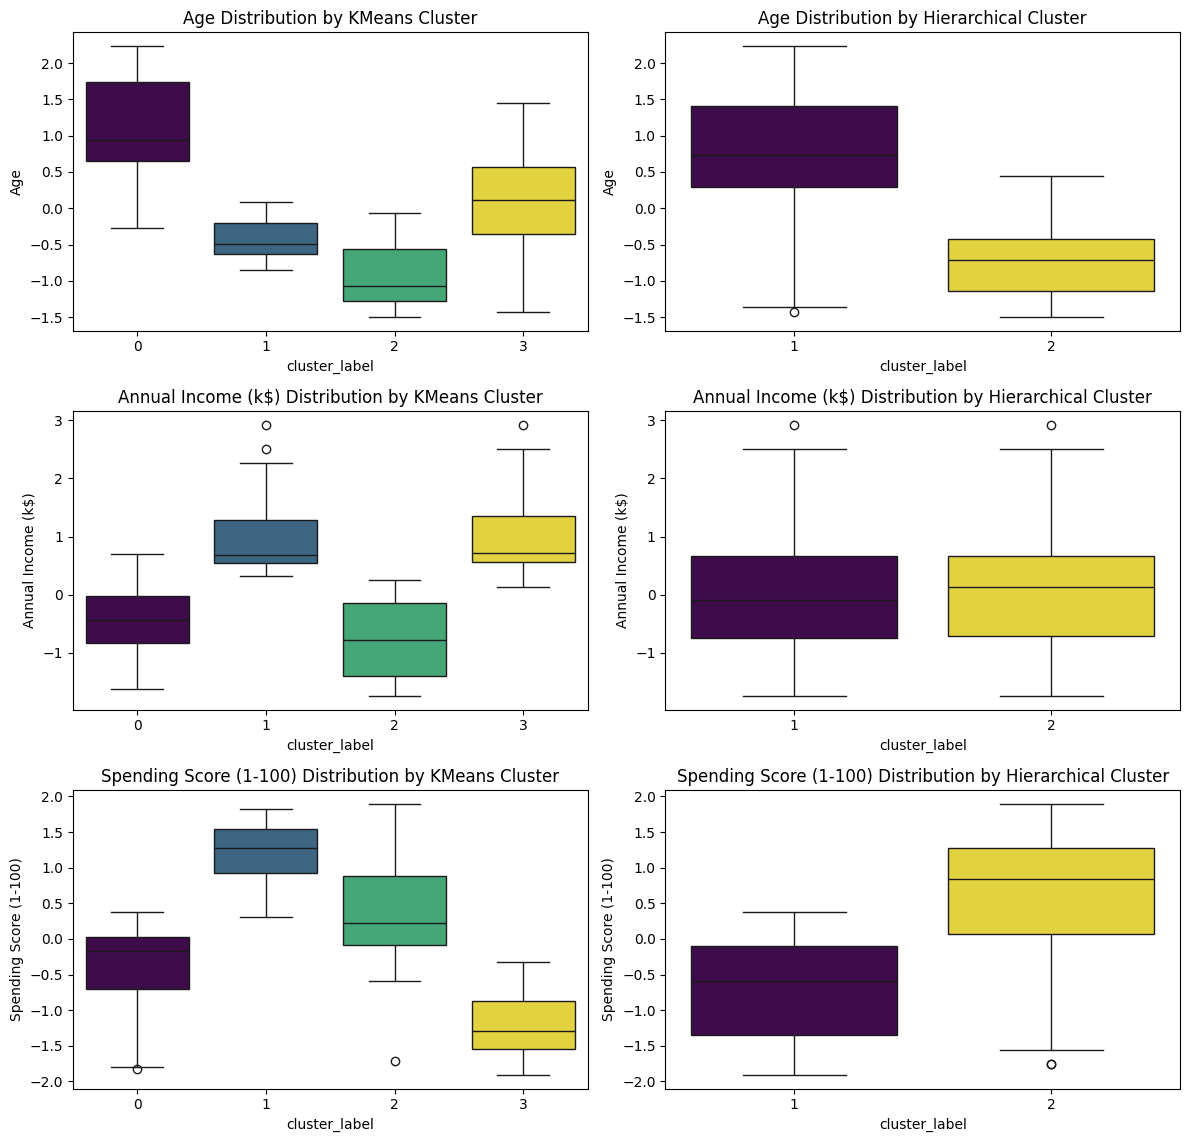

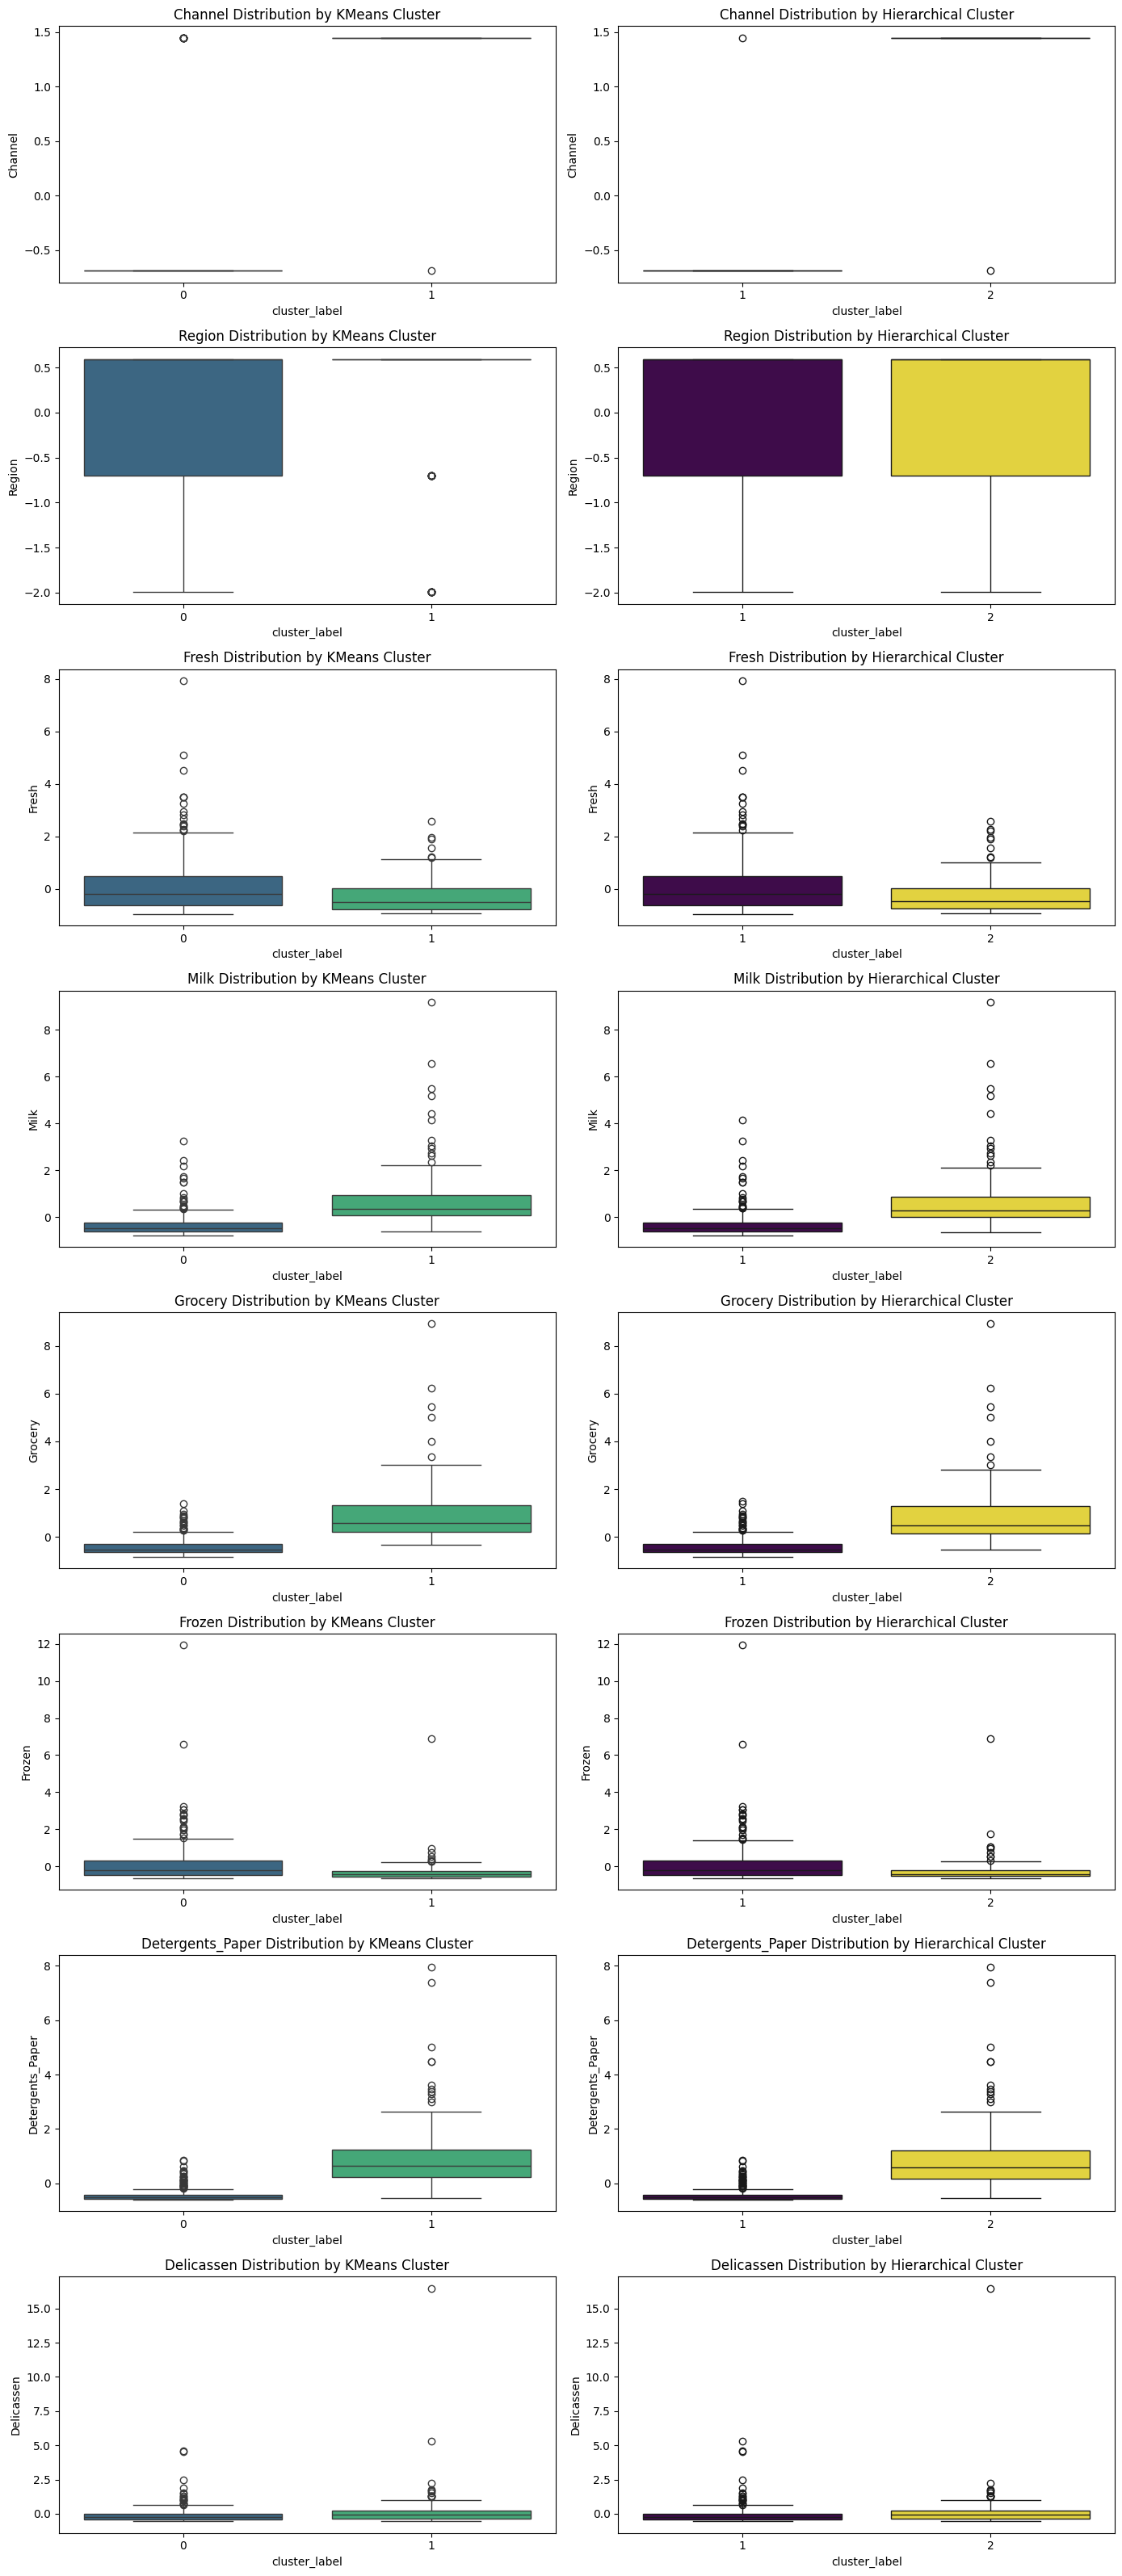

In [102]:
# Visualization Feature Distributions:

X_original_k = X_mall_scaled.copy()
X_original_k['cluster_label'] = X_original_k['KMeans_Cluster']
X_original_h = X_mall_scaled_0.copy()
X_original_h['cluster_label'] = X_original_h['hierarchical_cluster']

X_original_k_1= X_wholesale_scaled.copy()
X_original_k_1['cluster_label'] = X_original_k_1['KMeans_Cluster']
X_original_h_1 = X_wholesale_scaled_0.copy()
X_original_h_1['cluster_label'] = X_original_h_1['hierarchical_cluster']

# sns.boxplot(x='cluster_label', y='Annual Income (k$)', data=X_original_k)
# plt.title('Annual Income (k$) Distribution by Cluster -Kmeans')
# plt.show()
# --------------

 # Box plots for Clusters

# 1. Mall Customers Dataset

# Number of features to plot
num_features = len(X_original_k.columns[:-2])  # Exclude the cluster columns

# Subplots for KMeans and Hierarchical Clustering
fig, axes = plt.subplots(num_features, 2, figsize=(12, 4 * num_features))  # 2 plots per row (KMeans & Hierarchical)

for i, feature in enumerate(X_original_k.columns[:-2]):  # Exclude the cluster columns
    # KMeans Clustering plot on the left
    sns.boxplot(x='cluster_label', y=feature, hue='cluster_label', data=X_original_k,
                palette='viridis', dodge=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} Distribution by KMeans Cluster')
    axes[i, 0].legend([], [], frameon=False)  # Remove the legend

    # Hierarchical Clustering plot on the right
    sns.boxplot(x='cluster_label', y=feature, hue='cluster_label', data=X_original_h,
                palette='viridis', dodge=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Distribution by Hierarchical Cluster')
    axes[i, 1].legend([], [], frameon=False)  # Remove the legend

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

print('\n')

# 2. Wholesale Customers Dataset

# Number of features to plot
num_features_1 = len(X_original_k_1.columns[:-2])

# Subplots for KMeans and Hierarchical Clustering
fig1, axes1 = plt.subplots(num_features_1, 2, figsize=(14, 4 * num_features_1))

for i, feature in enumerate(X_original_k_1.columns[:-2]):
    # KMeans Clustering plot on the left
    sns.boxplot(x='cluster_label', y=feature, hue='cluster_label', data=X_original_k_1,
                palette='viridis', dodge=False, ax=axes1[i, 0])
    axes1[i, 0].set_title(f'{feature} Distribution by KMeans Cluster')
    axes1[i, 0].legend([], [], frameon=False)

    # Hierarchical Clustering plot on the right
    sns.boxplot(x='cluster_label', y=feature, hue='cluster_label', data=X_original_h_1,
                palette='viridis', dodge=False, ax=axes1[i, 1])
    axes1[i, 1].set_title(f'{feature} Distribution by Hierarchical Cluster')
    axes1[i, 1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()


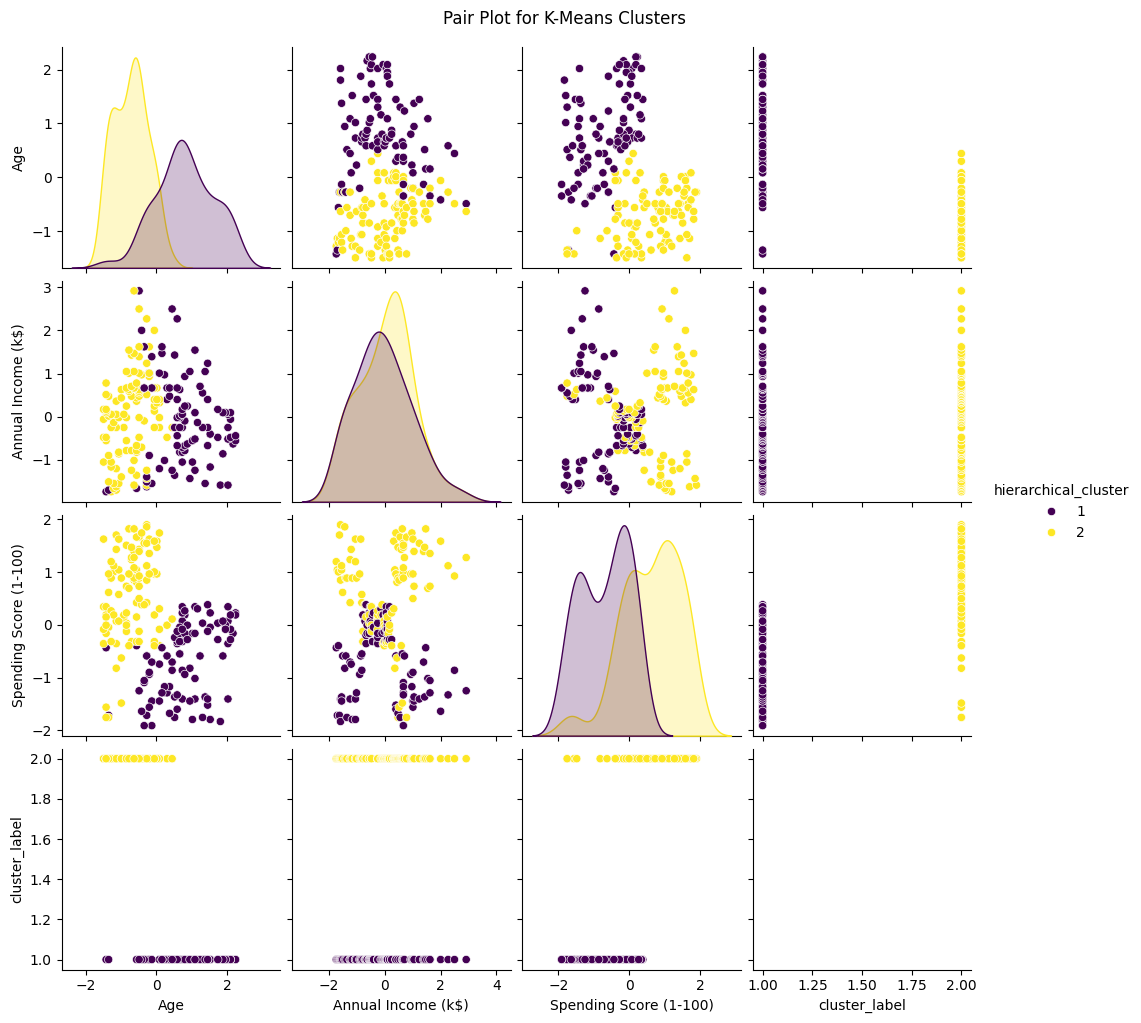

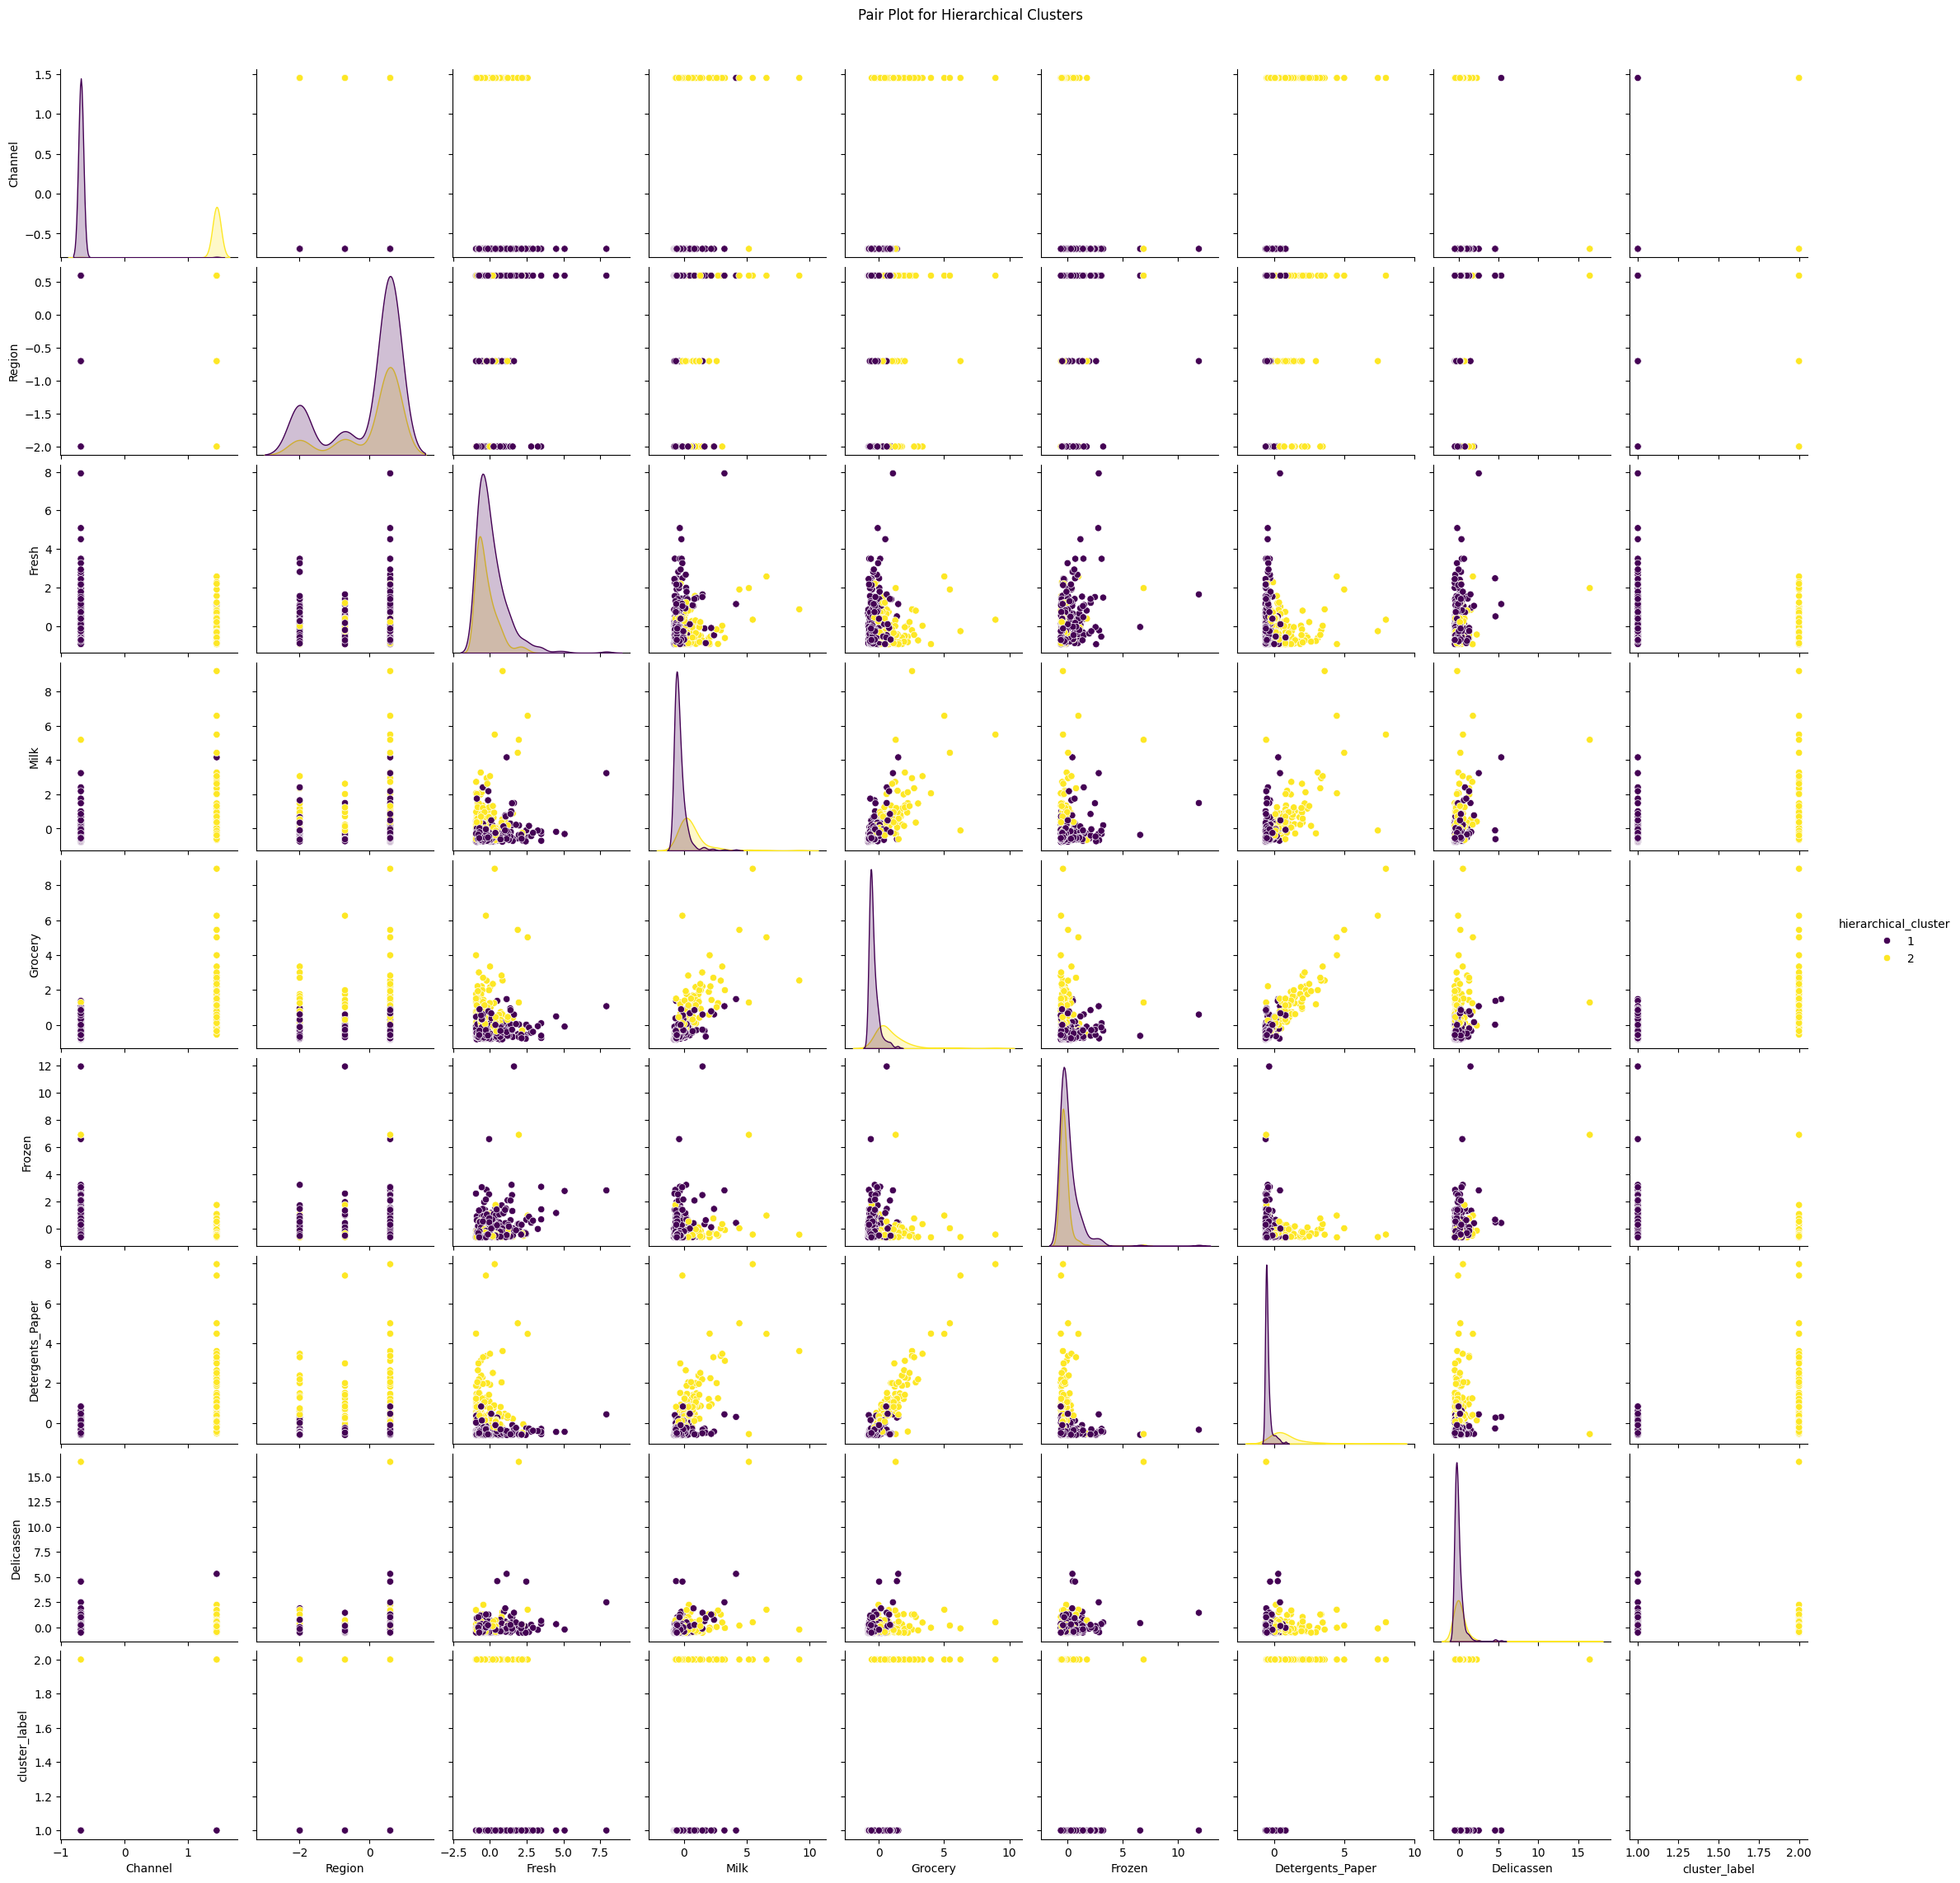

In [103]:
# Pair plot with Hierarchical Clustering clusters

a= sns.pairplot(X_original_h, hue='hierarchical_cluster', palette='viridis')
a.fig.suptitle('Pair Plot for K-Means Clusters', y=1.02)
plt.show()
print('\n')
b= sns.pairplot(X_original_h_1, hue='hierarchical_cluster', palette='viridis')
b.fig.suptitle('Pair Plot for Hierarchical Clusters', y=1.02)
plt.show()

### Step 8: Explore the impact of different clustering parameters


  (e.g., number of clusters in K-Means, linkage criteria in Hierarchical Clustering)



#### 1. Impact of Number of Clusters in K-Means


In [104]:
Mall_scaled = X_original_k.drop(columns=['KMeans_Cluster','cluster_label']).copy()
Wholesale_scaled = X_original_k_1.drop(columns=['KMeans_Cluster','cluster_label']).copy()


For K-Means with 2 clusters:
Silhouette Score: 0.38334854532899654
Davies-Bouldin Index: 1.1334121370931274

K-Means Summary with 2 Clusters:
                       Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster_2                                                      
0                 0.708923           -0.002475               -0.699391
1                -0.752773            0.002629                0.742652

For K-Means with 4 clusters:
Silhouette Score: 0.5278882731662502
Davies-Bouldin Index: 0.706913665546493

K-Means Summary with 4 Clusters:
                       Age  Annual Income (k$)  Spending Score (1-100)  \
KMeans_Cluster_4                                                         
0                 1.022997           -0.523274               -0.384971   
1                -0.428806            0.974847                1.216085   
2                -0.986545           -0.697237                0.373758   
3                 0.166601            1.043007               -

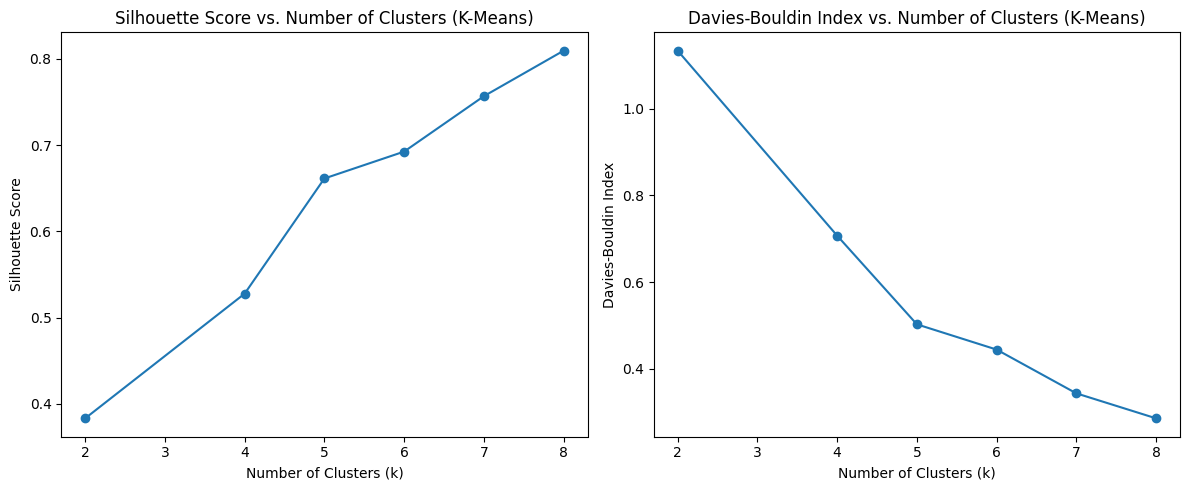

In [105]:
# List of different cluster numbers to test
cluster_numbers = [2, 4, 5, 6, 7, 8]   # k_values = range(2, 10)

# To store summaries for different cluster numbers
kmeans_summaries = {}
silhouette_scores = []
dbi_scores = []

for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(Mall_scaled)
    Mall_scaled[f'KMeans_Cluster_{n_clusters}'] = kmeans_labels

    # Clustering metrics
    silhouette_avg = silhouette_score(Mall_scaled, kmeans_labels)
    dbi_score = davies_bouldin_score(Mall_scaled, kmeans_labels)

    # Store scores
    silhouette_scores.append(silhouette_avg)
    dbi_scores.append(dbi_score)

    # Summary statistics
    kmeans_summaries[n_clusters] = Mall_scaled.groupby(f'KMeans_Cluster_{n_clusters}').mean()

    print(f'\nFor K-Means with {n_clusters} clusters:')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {dbi_score}')
    print(f"\nK-Means Summary with {n_clusters} Clusters:")
    print(kmeans_summaries[n_clusters])

# Plotting the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_numbers, dbi_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


For K-Means with 2 clusters:
Silhouette Score: 0.3941162849247617
Davies-Bouldin Index: 1.1989086959656183

K-Means Summary with 2 Clusters:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
KMeans_Cluster_2                                                               
0                -0.627387 -0.051609  0.123151 -0.336750 -0.421723  0.120532   
1                 1.432689  0.117853 -0.281225  0.768997  0.963039 -0.275244   

                  Detergents_Paper  Delicassen  
KMeans_Cluster_2                                
0                        -0.436340   -0.092852  
1                         0.996418    0.212034  

For K-Means with 4 clusters:
Silhouette Score: 0.40566906983234996
Davies-Bouldin Index: 0.9944302064368453

K-Means Summary with 4 Clusters:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
KMeans_Cluster_4                                                               
0                 1.270406  0.051916  

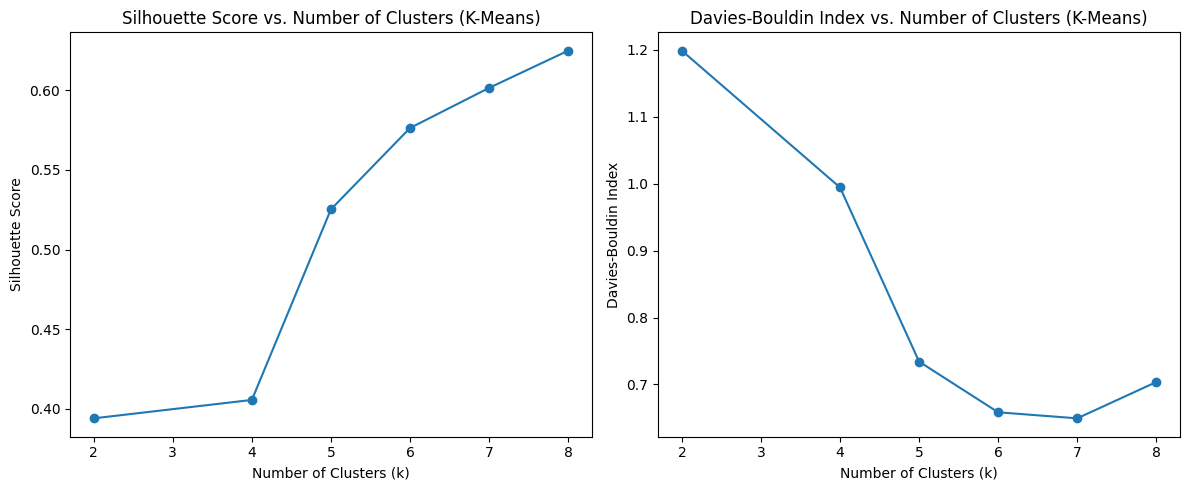

In [106]:
# List of different cluster numbers to test
cluster_numbers = [2, 4, 5, 6, 7, 8]   # k_values = range(2, 10)

# To store summaries for different cluster numbers
kmeans_summaries = {}
silhouette_scores = []
dbi_scores = []

for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(Wholesale_scaled)
    Wholesale_scaled[f'KMeans_Cluster_{n_clusters}'] = kmeans_labels

    # Clustering metrics
    silhouette_avg = silhouette_score(Wholesale_scaled, kmeans_labels)
    dbi_score = davies_bouldin_score(Wholesale_scaled, kmeans_labels)

    # Store scores
    silhouette_scores.append(silhouette_avg)
    dbi_scores.append(dbi_score)

    # Summary statistics
    kmeans_summaries[n_clusters] = Wholesale_scaled.groupby(f'KMeans_Cluster_{n_clusters}').mean()

    print(f'\nFor K-Means with {n_clusters} clusters:')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {dbi_score}')
    print(f"\nK-Means Summary with {n_clusters} Clusters:")
    print(kmeans_summaries[n_clusters])

# Plotting the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_numbers, dbi_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

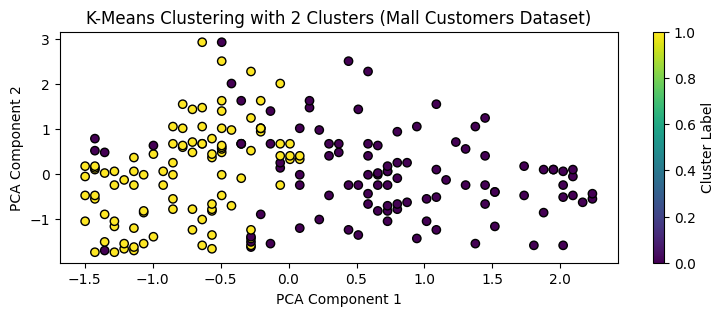

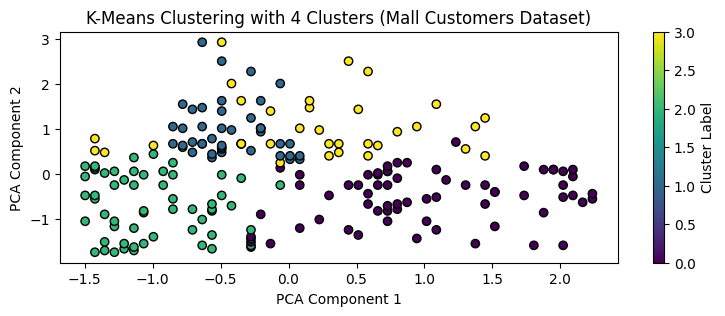

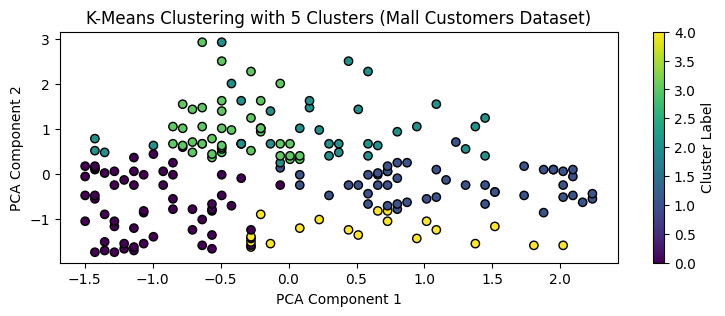

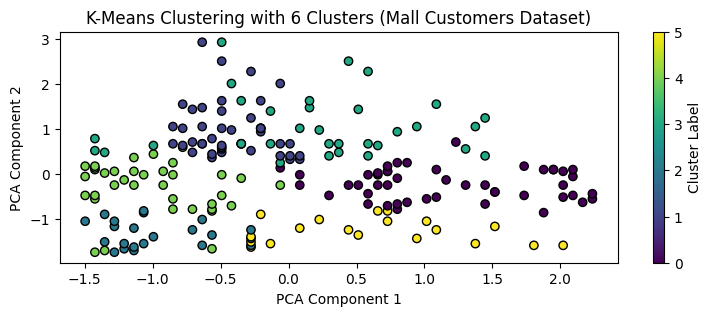

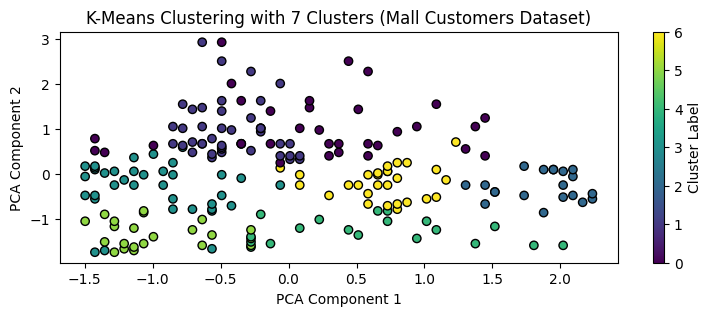

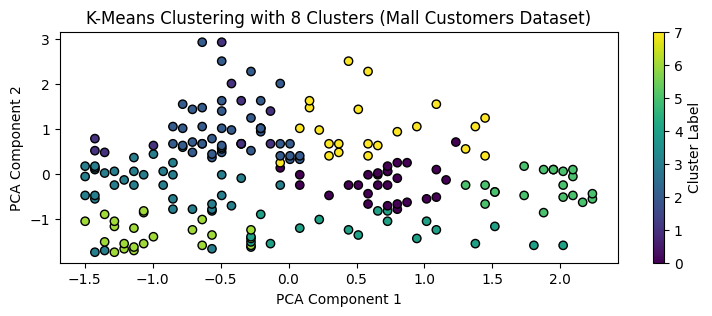

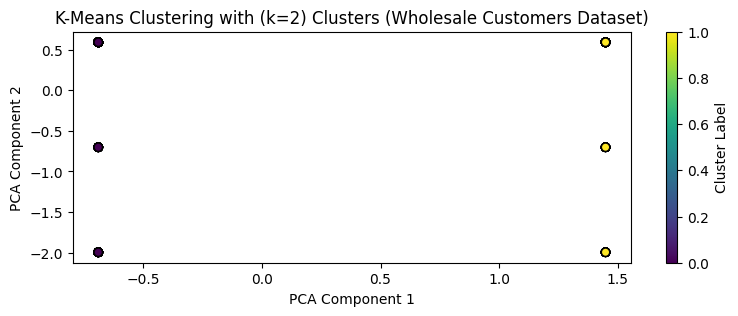

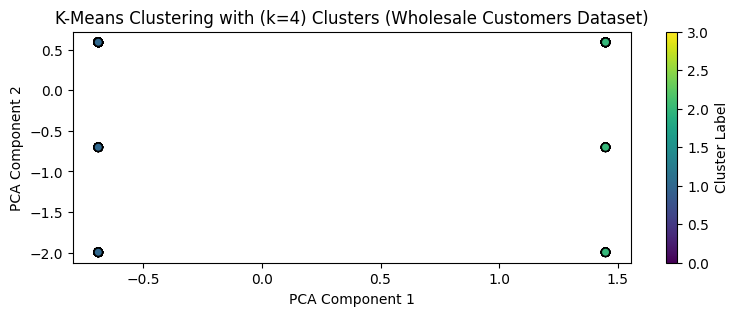

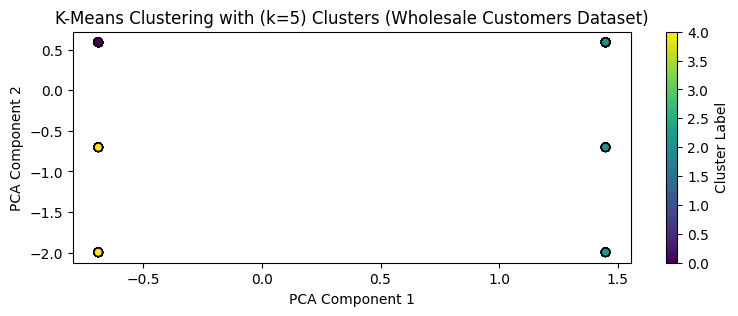

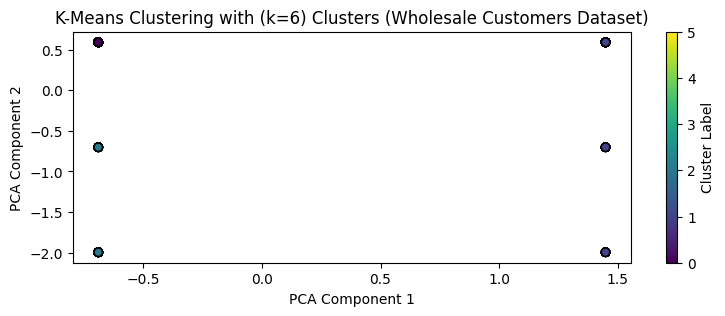

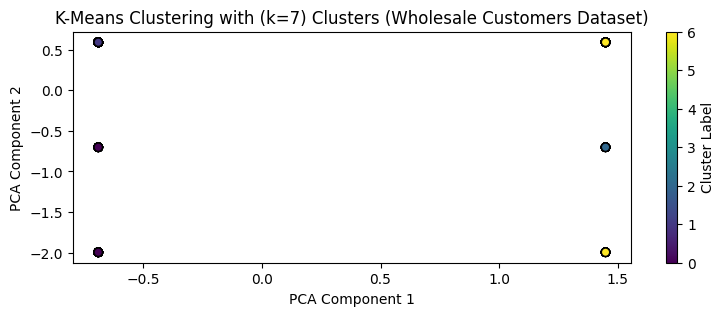

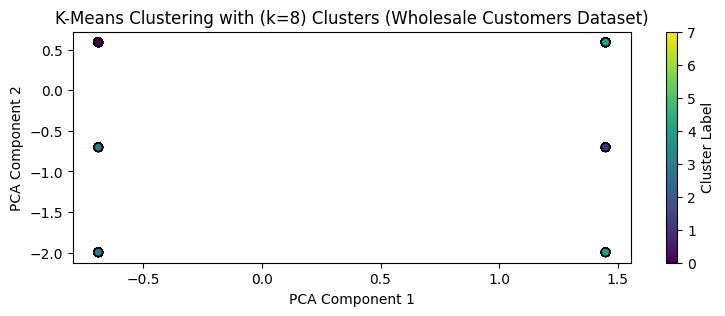

In [107]:
# Plotting K-Means clusters for different cluster numbers
for n_clusters in cluster_numbers:
    plt.figure(figsize=(9, 3))
    plt.scatter(k_mall_pca.iloc[:, 0], k_mall_pca.iloc[:, 1], c=Mall_scaled[f'KMeans_Cluster_{n_clusters}'], cmap='viridis', edgecolor='k')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters (Mall Customers Dataset)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

for n_clusters in cluster_numbers:
    plt.figure(figsize=(9, 3))
    plt.scatter(k_wholesale_pca.iloc[:, 0], k_wholesale_pca.iloc[:, 1], c=Wholesale_scaled[f'KMeans_Cluster_{n_clusters}'], cmap='viridis', edgecolor='k')
    plt.title(f'K-Means Clustering with (k={n_clusters}) Clusters (Wholesale Customers Dataset)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

#### 2. Impact of Linkage Criteria in Hierarchical Clustering


In [108]:
Mall_scaled_h = X_original_h.drop(columns=['hierarchical_cluster','cluster_label']).copy()
Wholesale_scaled_h = X_original_h_1.drop(columns=['hierarchical_cluster','cluster_label']).copy()

###### For Mall

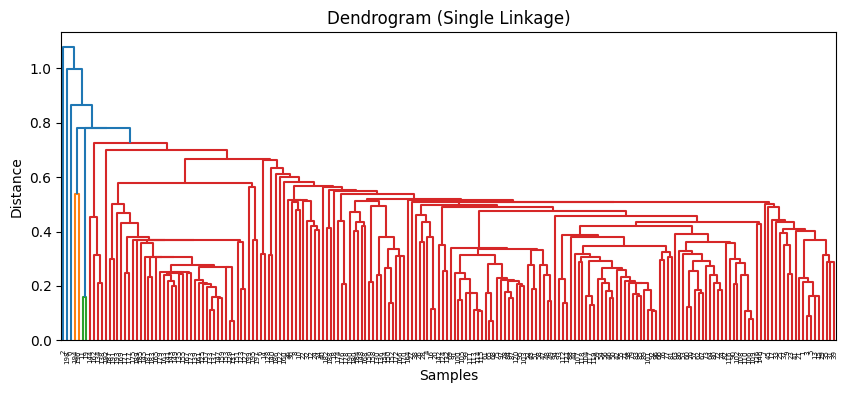

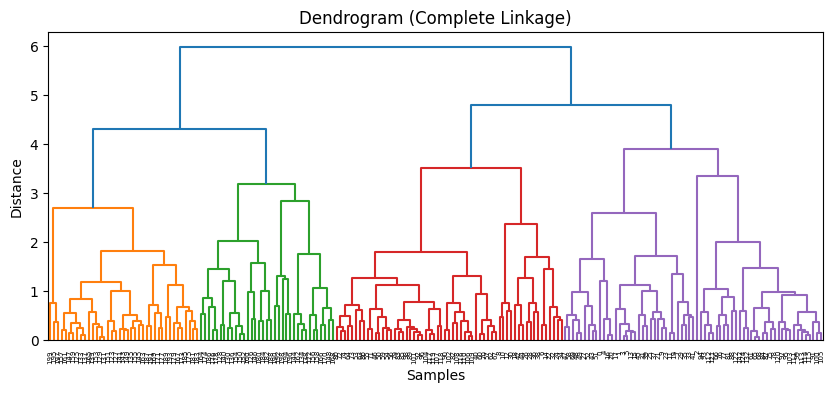

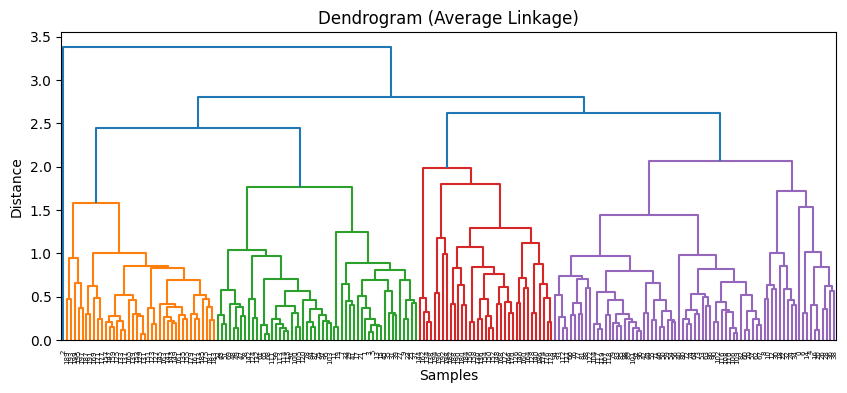

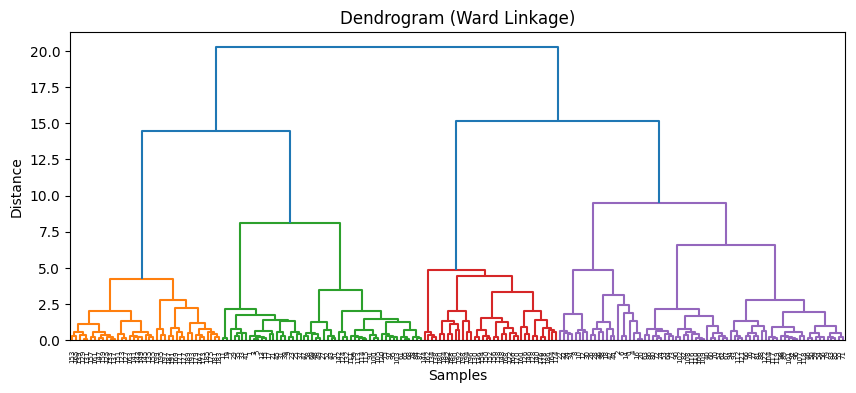


Hierarchical Clustering Summary (Single Linkage):
        Age  Annual Income (k$)  Spending Score (1-100)  \
1 -0.771571            0.040703                0.794690   
2  0.644155           -0.033981               -0.663457   

   Hierarchical_Cluster_single  Hierarchical_Cluster_complete  \
1                     1.000000                       1.571429   
2                     1.009174                       1.678899   

   Hierarchical_Cluster_average  Hierarchical_Cluster_ward  
1                      1.000000                        1.0  
2                      1.009174                        2.0  

Hierarchical Clustering Summary (Complete Linkage):
        Age  Annual Income (k$)  Spending Score (1-100)  \
1 -0.771571            0.040703                0.794690   
2  0.644155           -0.033981               -0.663457   

   Hierarchical_Cluster_single  Hierarchical_Cluster_complete  \
1                     1.000000                       1.571429   
2                     1.009174 

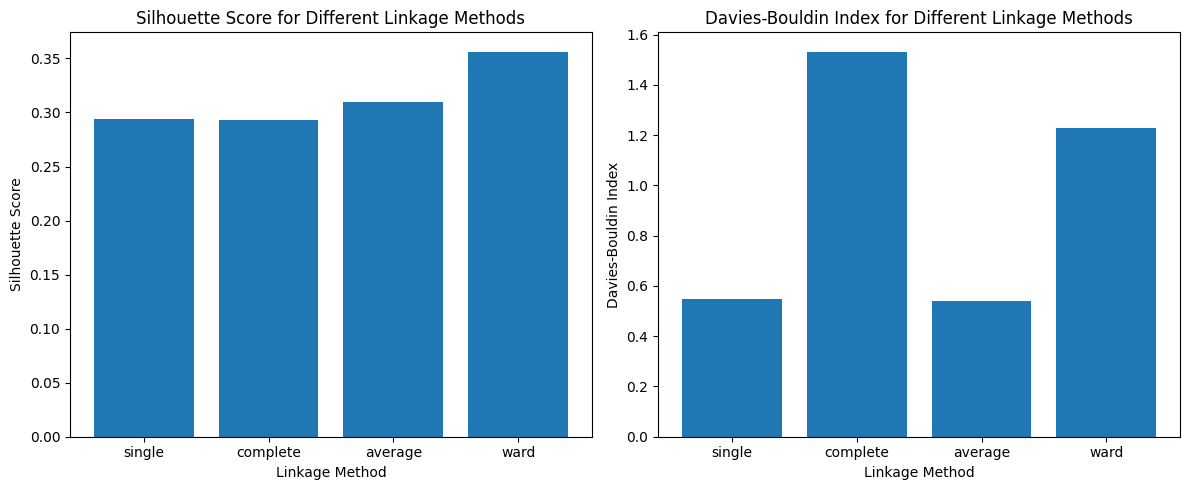

In [109]:
# Set the optimal number of clusters
optimal_clusters_mall = 2  #  (defined this based on our analysis)

# List of linkage criteria to test
linkage_methods = ['single', 'complete', 'average', 'ward']

# Lists to store scores for different linkage methods
silhouette_scores_linkage = []
davies_bouldin_indices_linkage = []

for method in linkage_methods:
    # Performing hierarchical clustering with different linkage criteria
    Z = linkage(Mall_scaled_h, method=method)
    labels = fcluster(Z, t=optimal_clusters_mall, criterion='maxclust')

    # Adding labels to the dataset
    Mall_scaled_h[f'Hierarchical_Cluster_{method}'] = labels

    # Silhouette Score
    silhouette_avg = silhouette_score(Mall_scaled_h, labels)
    silhouette_scores_linkage.append(silhouette_avg)

    # Davies-Bouldin Index
    dbi = davies_bouldin_score(Mall_scaled_h, labels)
    davies_bouldin_indices_linkage.append(dbi)

    # print(f'\nFor Hierarchical Clustering with {method} linkage:')
    # print(f'Silhouette Score: {silhouette_avg}')
    # print(f'Davies-Bouldin Index: {dbi_score}')

    # Dendrogram Plot
    plt.figure(figsize=(10, 4))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# Computing the mean values of features for each Hierarchical Clustering cluster
hierarchical_cluster_summaries = {}  # Stores summaries for different linkage methods

for method in linkage_methods:
    labels = fcluster(Z, t=optimal_clusters_mall, criterion='maxclust')    #  labels = Mall_scaled_h[f'Hierarchical_Cluster_{method}']
    hierarchical_cluster_summaries[method] = Mall_scaled_h.groupby(labels).mean()
    print(f"\nHierarchical Clustering Summary ({method.capitalize()} Linkage):")
    print(hierarchical_cluster_summaries[method])

# Plotting scores
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.bar(linkage_methods, silhouette_scores_linkage)
plt.title('Silhouette Score for Different Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.bar(linkage_methods, davies_bouldin_indices_linkage)
plt.title('Davies-Bouldin Index for Different Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

In [110]:
# Compute Silhouette Scores for Hierarchical Clustering with different linkage methods
silhouette_hierarchical = {}

for method in linkage_methods:
    # Performing hierarchical clustering with different linkage criteria
    Z = linkage(Mall_scaled_h, method=method)
    labels = fcluster(Z, t=optimal_clusters, criterion='maxclust') # Recalculating labels inside loop

    silhouette_hierarchical[method] = silhouette_score(Mall_scaled_h, labels)
    print(f'Silhouette Score for Hierarchical Clustering ({method.capitalize()} Linkage): {silhouette_hierarchical[method]}')

print('\n')

# Compute Davies-Bouldin Index for Hierarchical Clustering with different linkage methods
dbi_hierarchical = {}

for method in linkage_methods:
    # Performing hierarchical clustering with different linkage criteria
    Z = linkage(Mall_scaled_h, method=method)
    labels = fcluster(Z, t=optimal_clusters, criterion='maxclust') # Recalculating labels inside loop

    dbi_hierarchical[method] = davies_bouldin_score(Mall_scaled_h, labels)
    print(f'Davies-Bouldin Index for Hierarchical Clustering ({method.capitalize()} Linkage): {dbi_hierarchical[method]}')

Silhouette Score for Hierarchical Clustering (Single Linkage): 0.29645873974379056
Silhouette Score for Hierarchical Clustering (Complete Linkage): 0.27910236213536943
Silhouette Score for Hierarchical Clustering (Average Linkage): 0.29645873974379056
Silhouette Score for Hierarchical Clustering (Ward Linkage): 0.3563146844669064


Davies-Bouldin Index for Hierarchical Clustering (Single Linkage): 0.5582004439399593
Davies-Bouldin Index for Hierarchical Clustering (Complete Linkage): 1.62356249257271
Davies-Bouldin Index for Hierarchical Clustering (Average Linkage): 0.5582004439399593
Davies-Bouldin Index for Hierarchical Clustering (Ward Linkage): 1.229516424089489


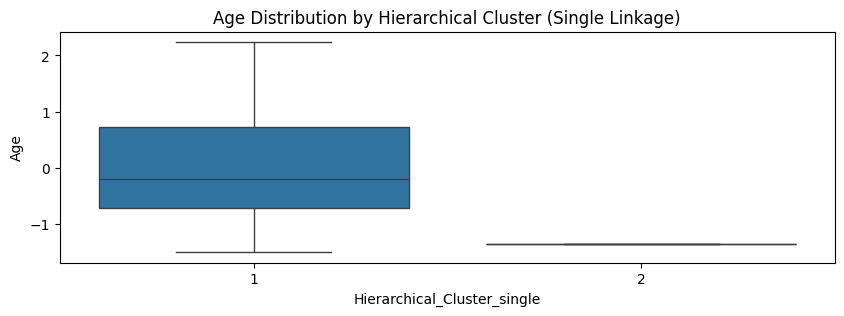

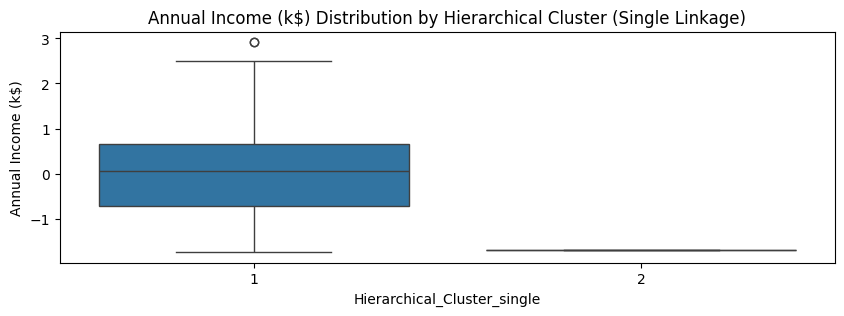

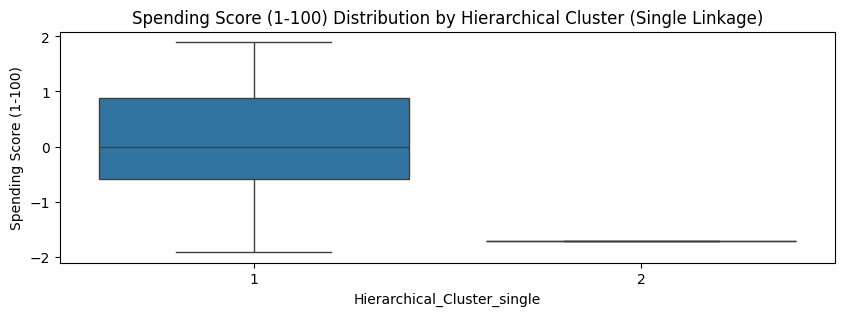

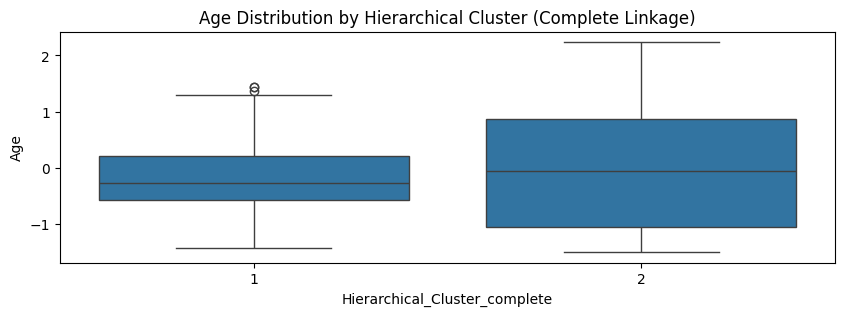

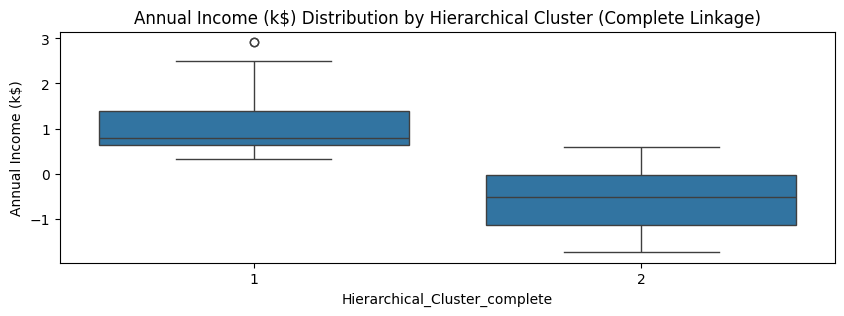

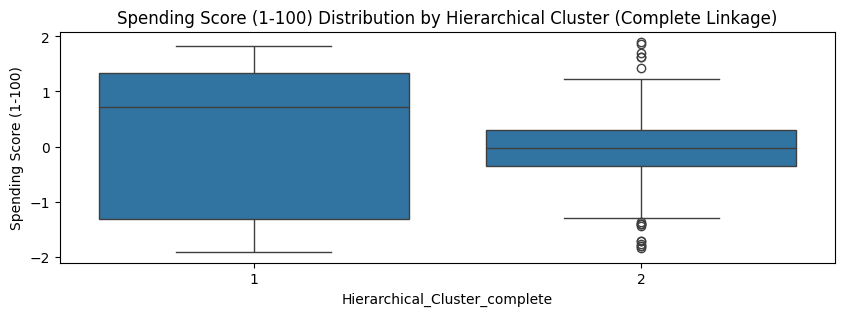

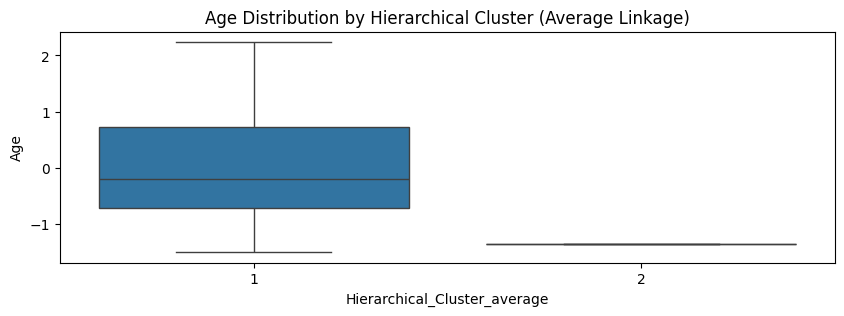

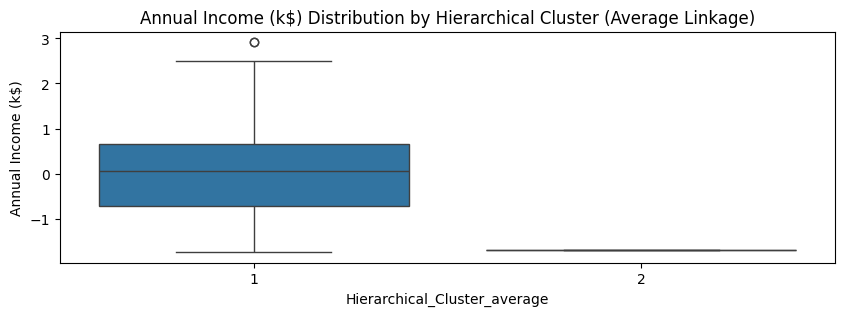

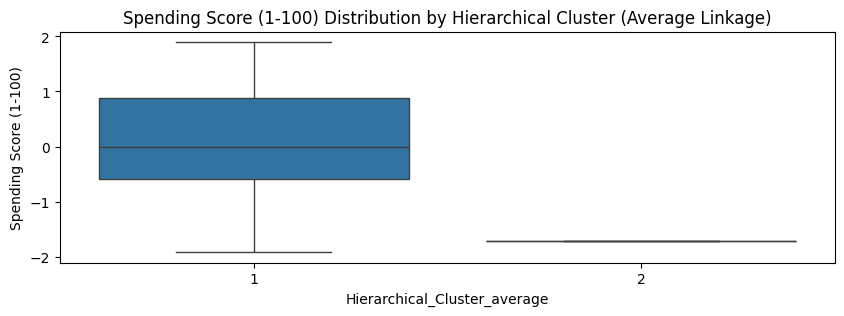

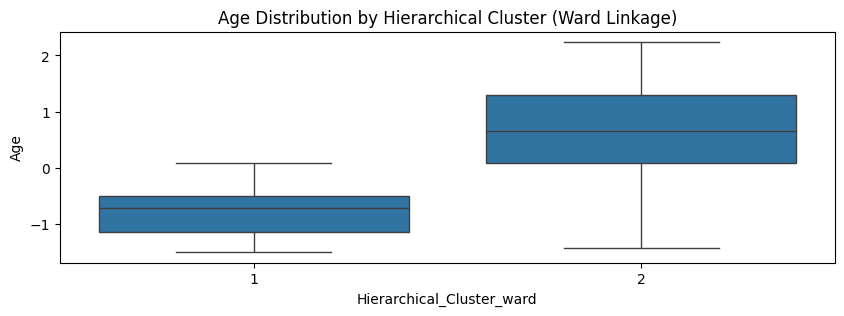

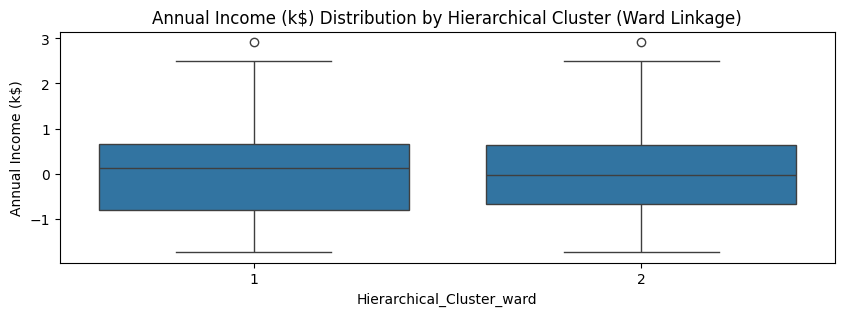

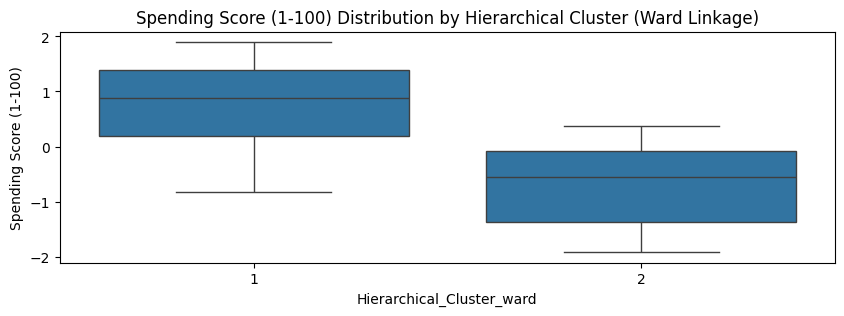

In [111]:
# List of features to plot for boxplots
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot box plots for Hierarchical Clustering clusters
for method in linkage_methods:
    for feature in features:
        plt.figure(figsize=(10, 3))
        sns.boxplot(x=f'Hierarchical_Cluster_{method}', y=feature, data=Mall_scaled_h)
        plt.title(f'{feature} Distribution by Hierarchical Cluster ({method.capitalize()} Linkage)')
        plt.show()

##### For Wholesale

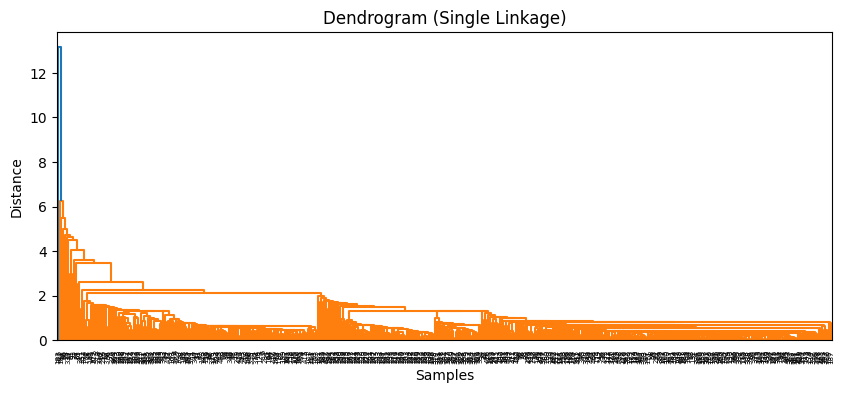

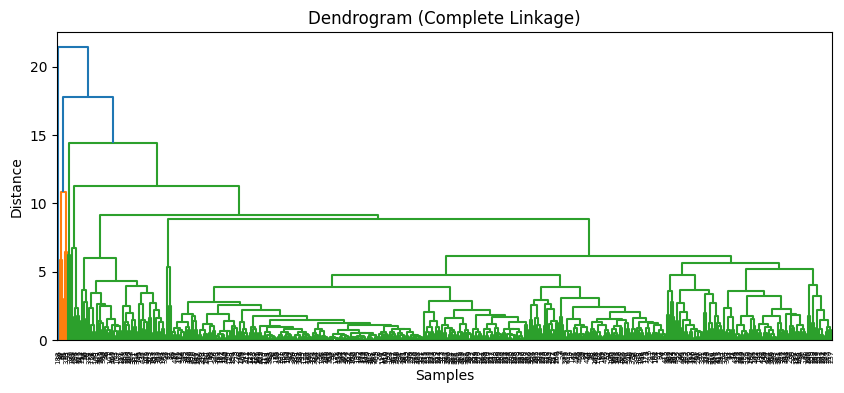

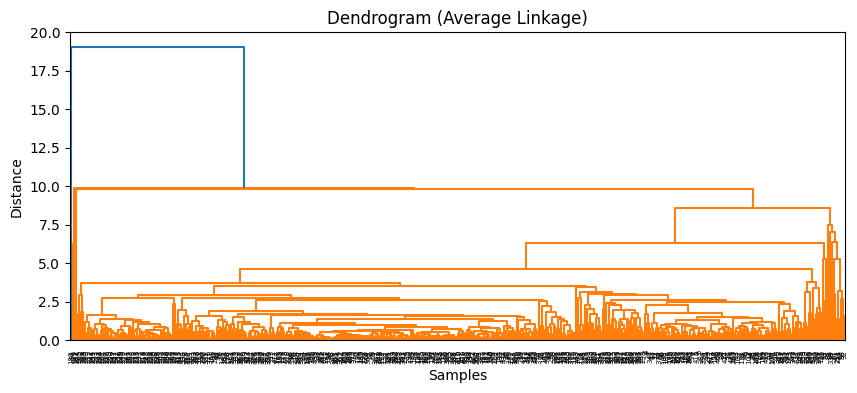

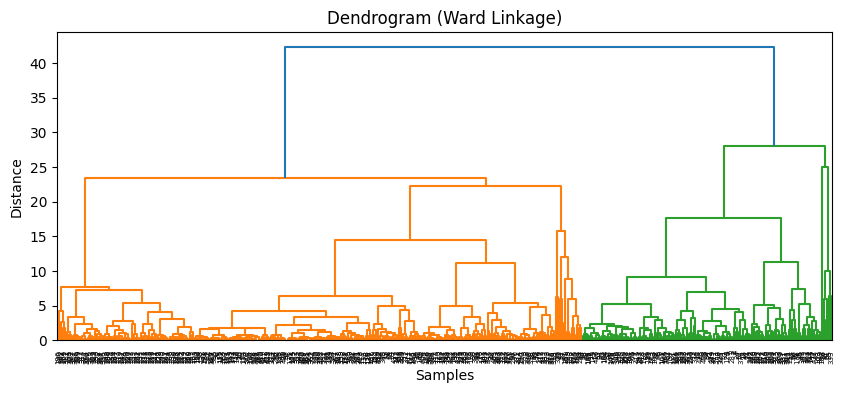

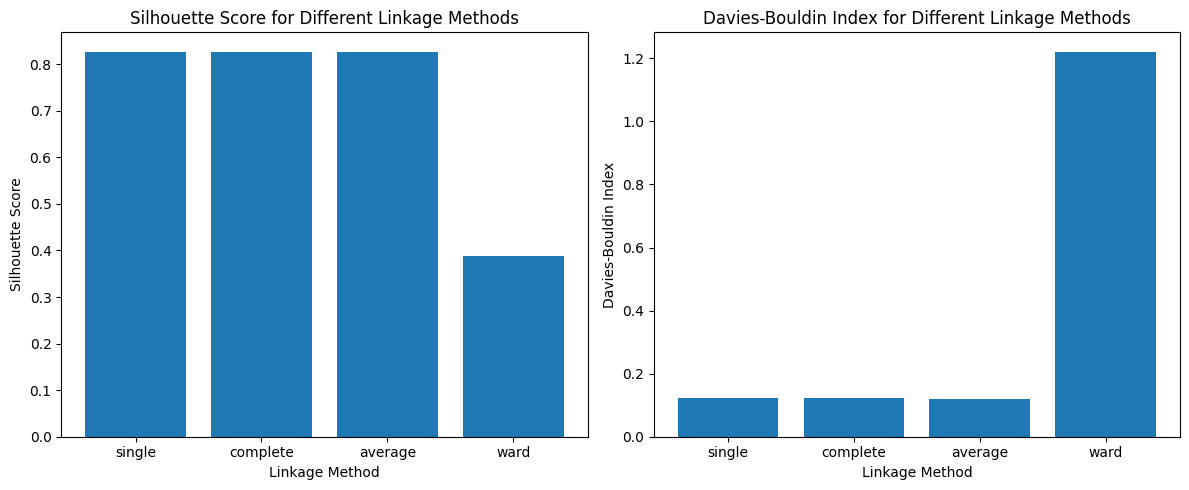

In [112]:
# Set the optimal number of clusters
optimal_clusters_wholesale = 2  # (defined this based on our analysis)

# List of linkage criteria to test
linkage_methods = ['single', 'complete', 'average', 'ward']

# Lists to store scores for different linkage methods
silhouette_scores_linkage = []
davies_bouldin_indices_linkage = []

for method in linkage_methods:
    # Performing hierarchical clustering with different linkage criteria
    Z = linkage(Wholesale_scaled_h, method=method)
    labels = fcluster(Z, t=optimal_clusters_wholesale, criterion='maxclust')

    # Adding labels to the dataset
    Wholesale_scaled_h[f'Hierarchical_Cluster_{method}'] = labels

    # Silhouette Score
    silhouette_avg = silhouette_score(Wholesale_scaled_h, labels)
    silhouette_scores_linkage.append(silhouette_avg)

    # Davies-Bouldin Index
    dbi = davies_bouldin_score(Wholesale_scaled_h, labels)
    davies_bouldin_indices_linkage.append(dbi)

    # Dendrogram Plot
    plt.figure(figsize=(10, 4))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# Plotting the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.bar(linkage_methods, silhouette_scores_linkage)
plt.title('Silhouette Score for Different Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.bar(linkage_methods, davies_bouldin_indices_linkage)
plt.title('Davies-Bouldin Index for Different Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

In [113]:
optimal_clusters =2

# Compute Silhouette Scores for Hierarchical Clustering with different linkage methods
silhouette_hierarchical = {}

for method in linkage_methods:
    # Performing hierarchical clustering with different linkage criteria
    Z = linkage(Wholesale_scaled, method=method)
    labels = fcluster(Z, t=optimal_clusters, criterion='maxclust') # Recalculating labels inside loop

    silhouette_hierarchical[method] = silhouette_score(Wholesale_scaled, labels)
    print(f'Silhouette Score for Hierarchical Clustering ({method.capitalize()} Linkage): {silhouette_hierarchical[method]}')

print('\n')

# Compute Davies-Bouldin Index for Hierarchical Clustering with different linkage methods
dbi_hierarchical = {}

for method in linkage_methods:
    # Performing hierarchical clustering with different linkage criteria
    Z = linkage(Wholesale_scaled, method=method)
    labels = fcluster(Z, t=optimal_clusters, criterion='maxclust') # Recalculating labels inside loop

    dbi_hierarchical[method] = davies_bouldin_score(Wholesale_scaled, labels)
    print(f'Davies-Bouldin Index for Hierarchical Clustering ({method.capitalize()} Linkage): {dbi_hierarchical[method]}')

Silhouette Score for Hierarchical Clustering (Single Linkage): 0.7421298552062547
Silhouette Score for Hierarchical Clustering (Complete Linkage): 0.7421298552062547
Silhouette Score for Hierarchical Clustering (Average Linkage): 0.7421298552062547
Silhouette Score for Hierarchical Clustering (Ward Linkage): 0.39664682691354797


Davies-Bouldin Index for Hierarchical Clustering (Single Linkage): 0.18855554313672543
Davies-Bouldin Index for Hierarchical Clustering (Complete Linkage): 0.18855554313672543
Davies-Bouldin Index for Hierarchical Clustering (Average Linkage): 0.18855554313672543
Davies-Bouldin Index for Hierarchical Clustering (Ward Linkage): 1.513340788410766


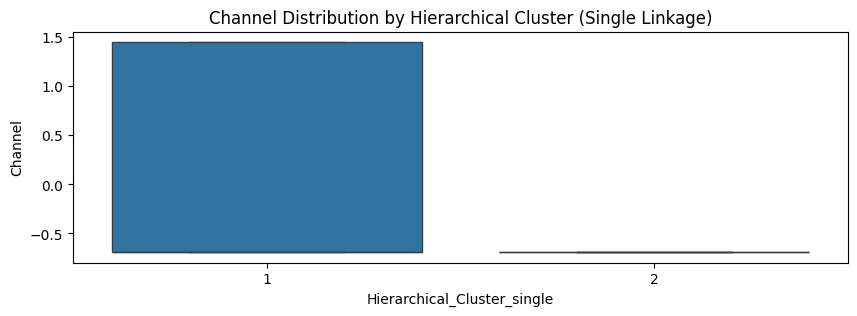

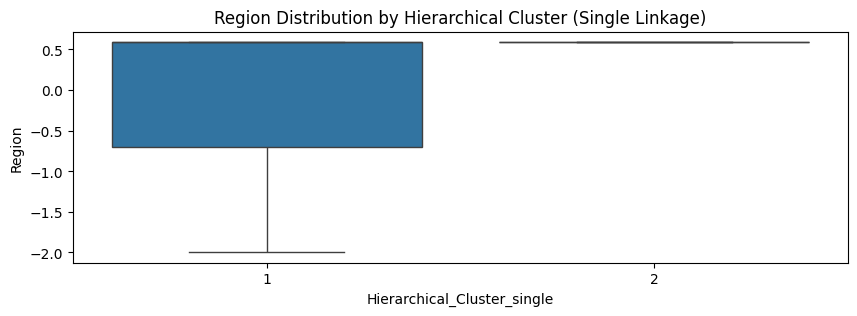

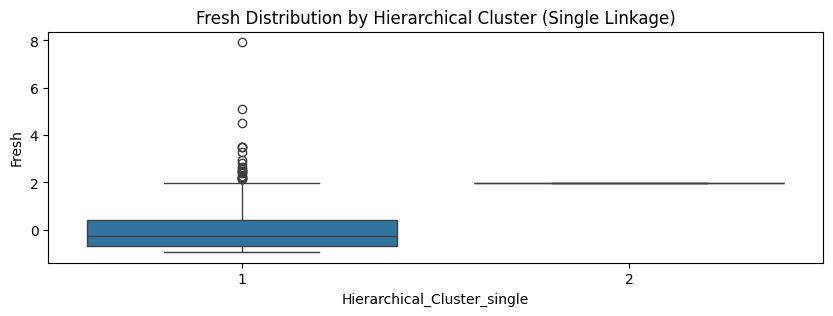

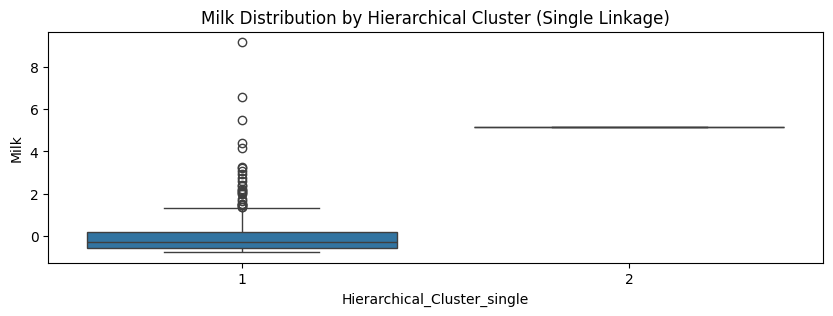

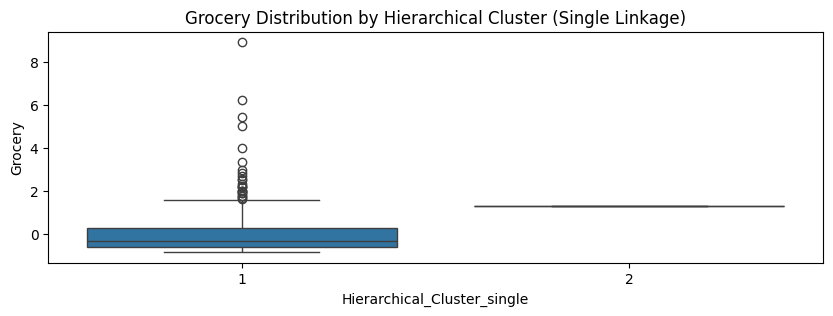

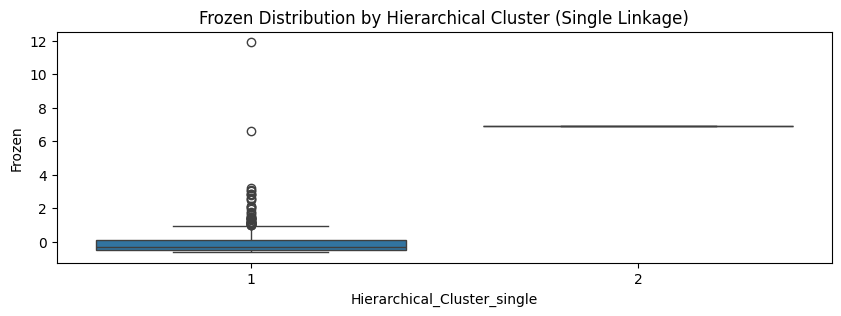

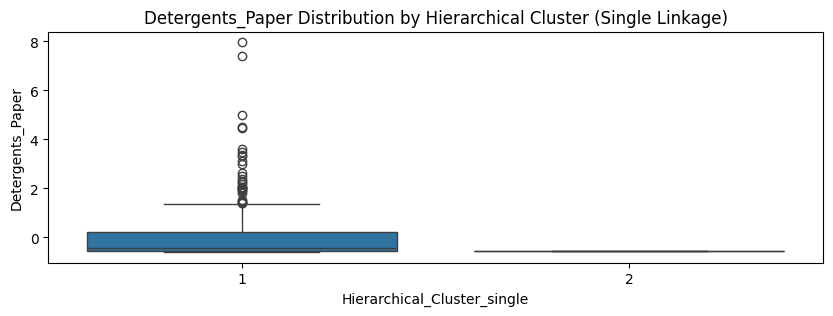

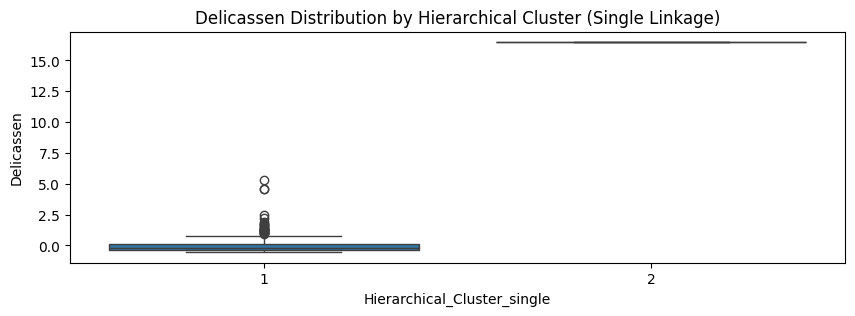

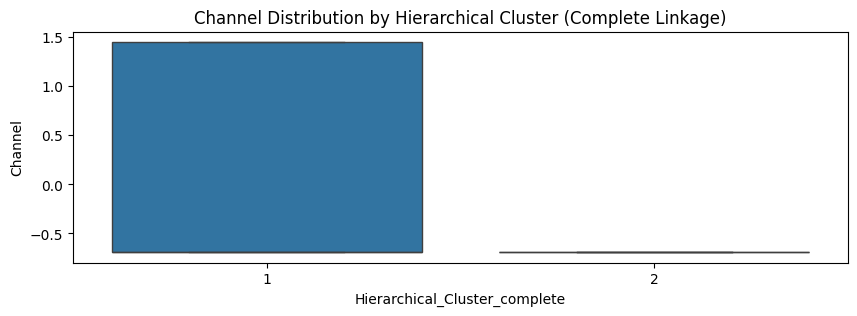

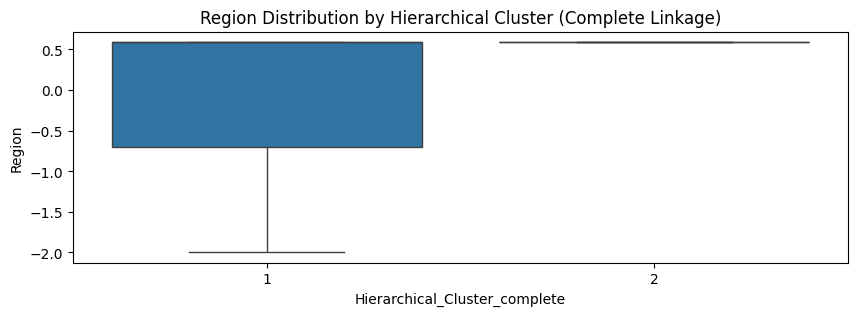

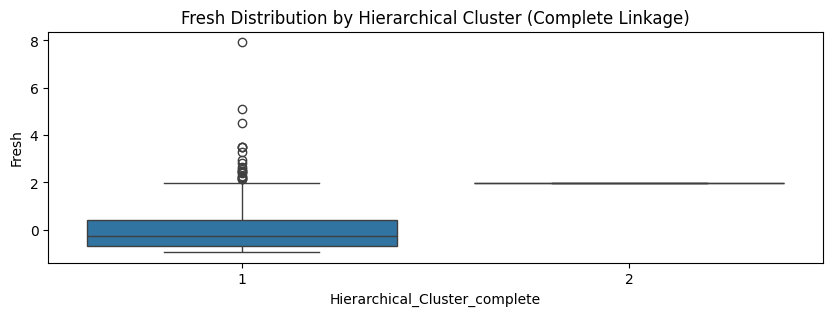

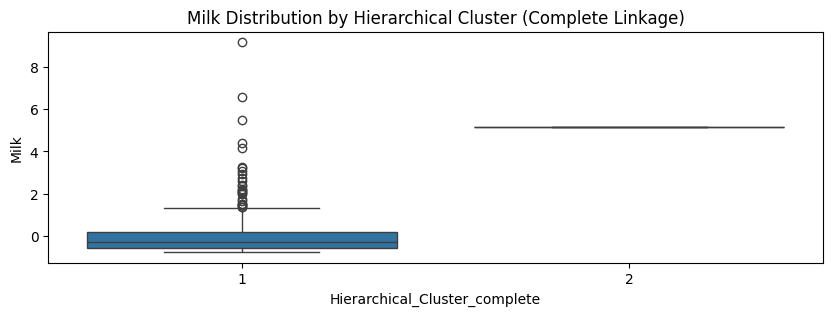

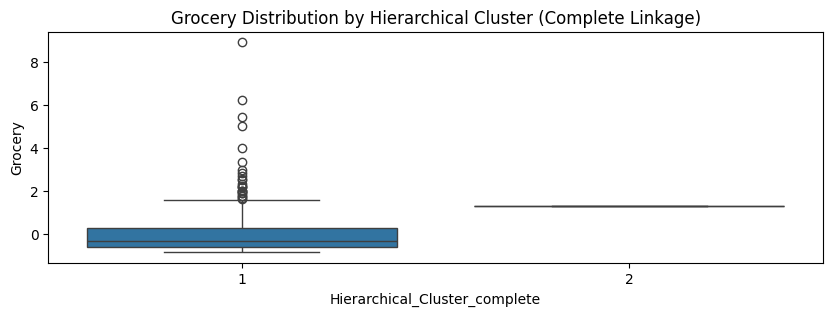

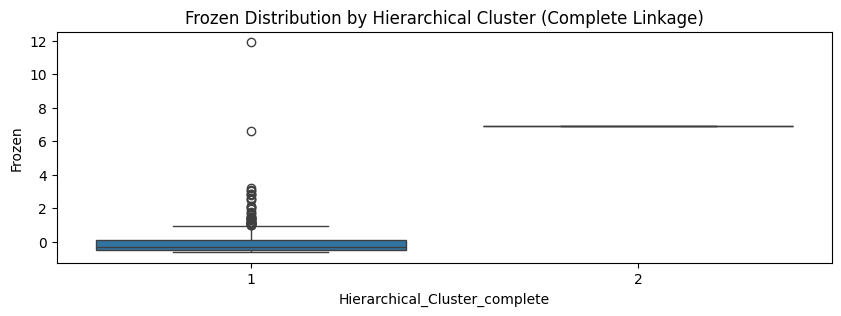

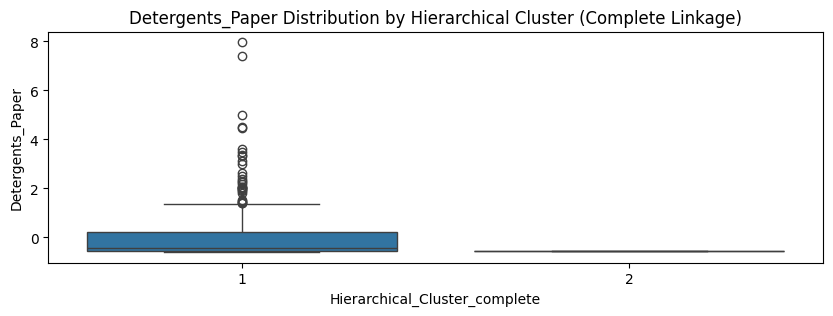

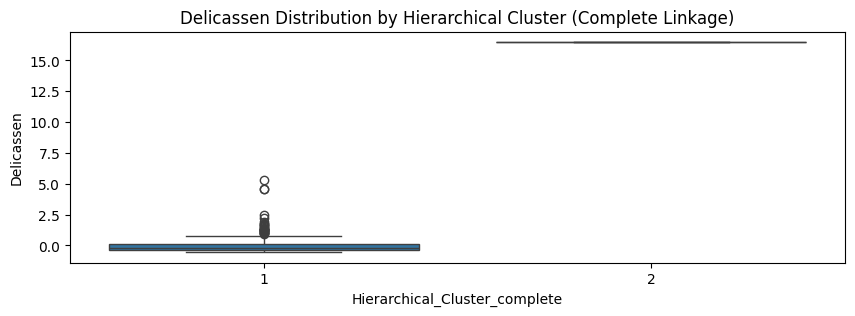

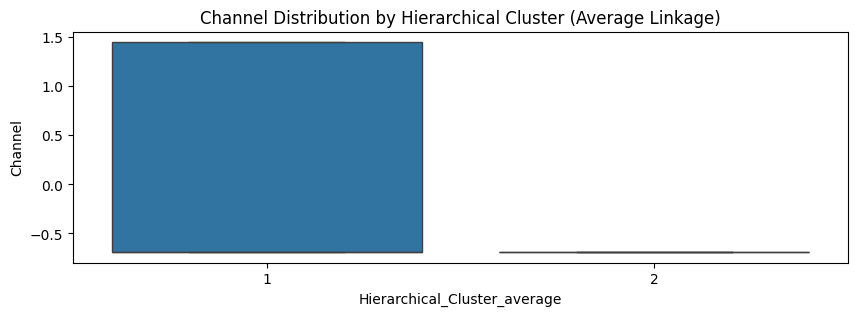

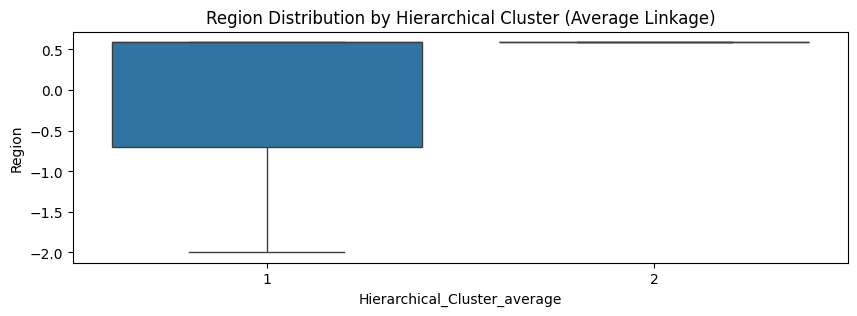

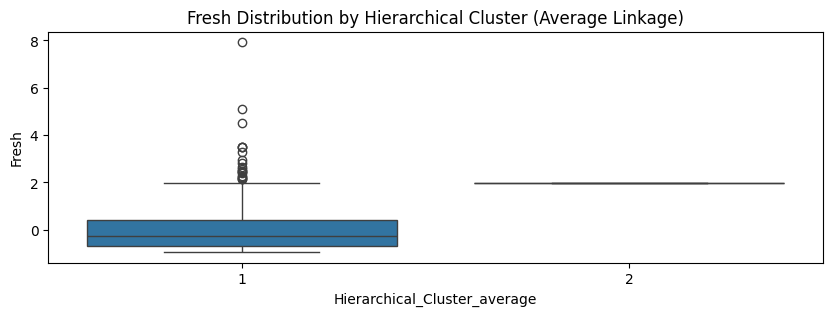

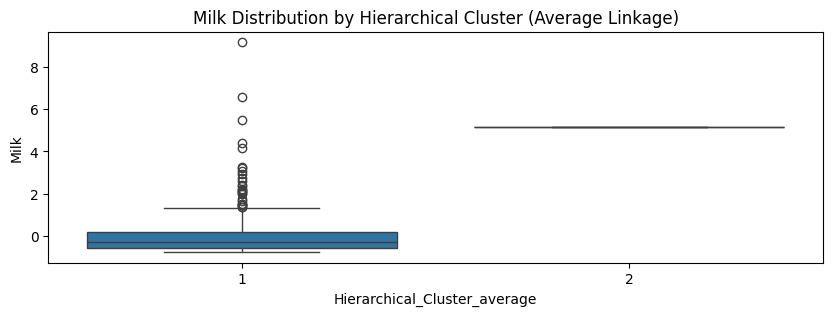

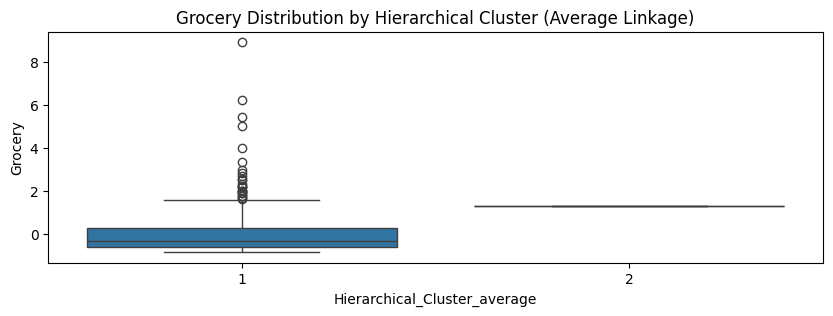

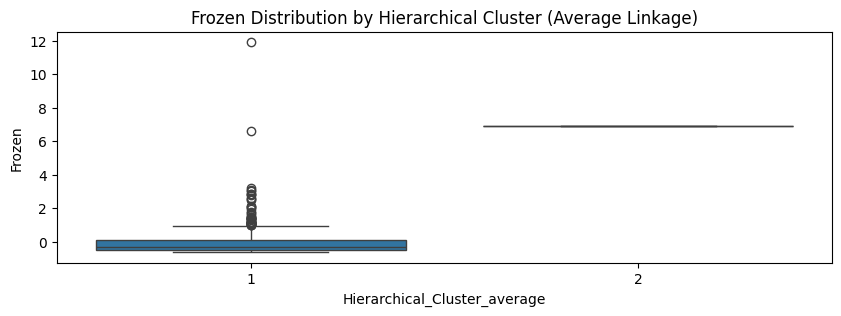

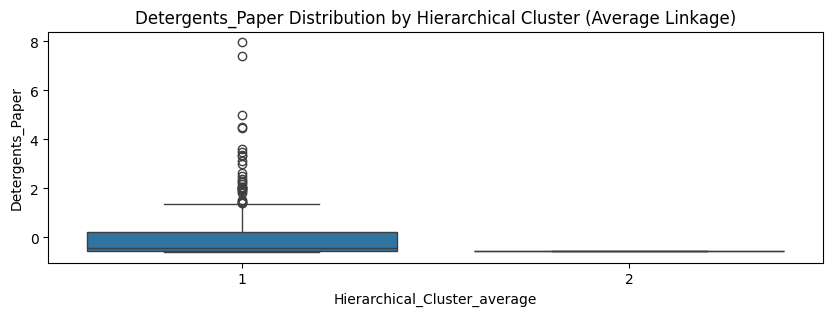

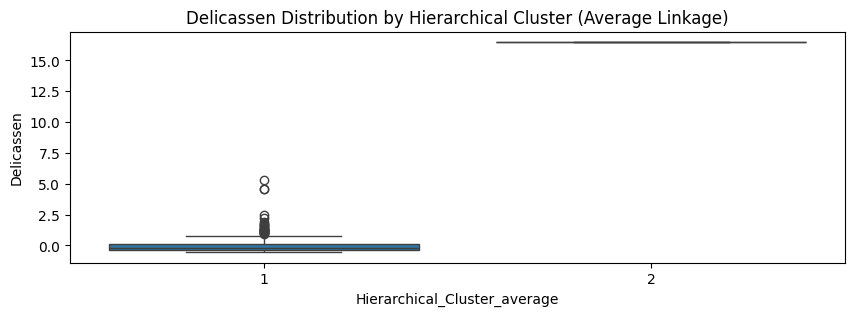

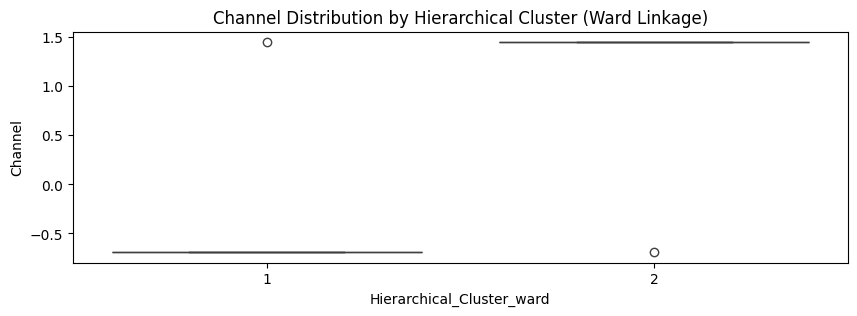

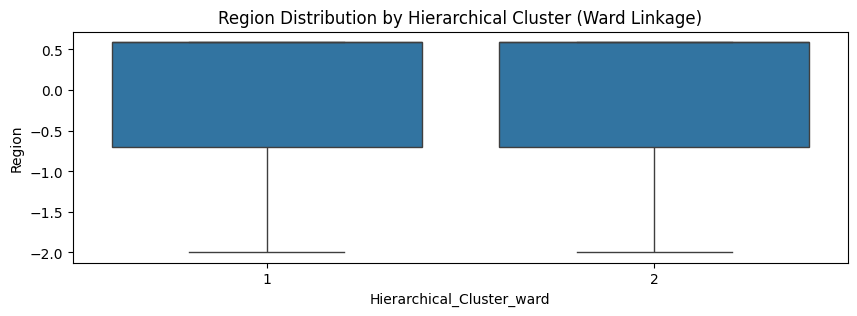

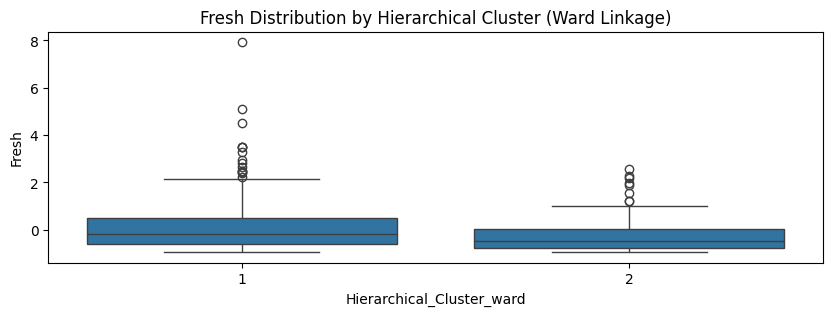

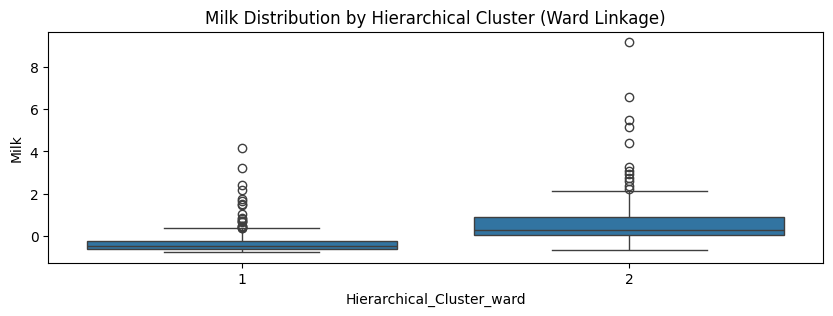

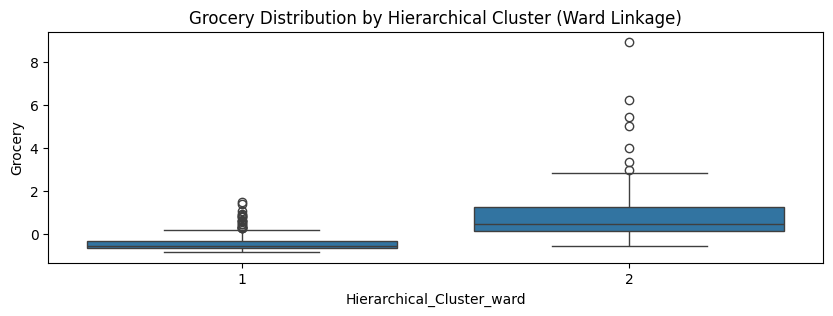

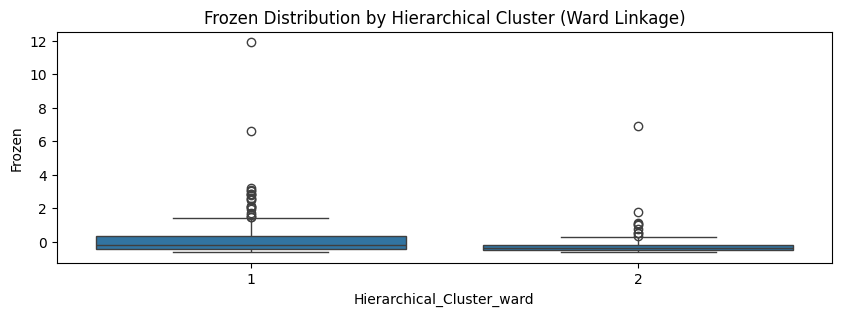

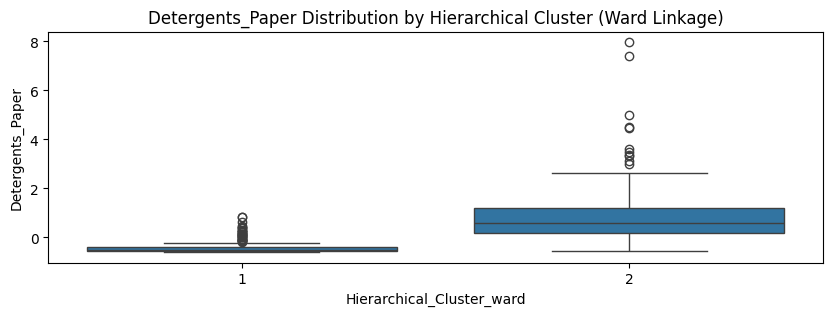

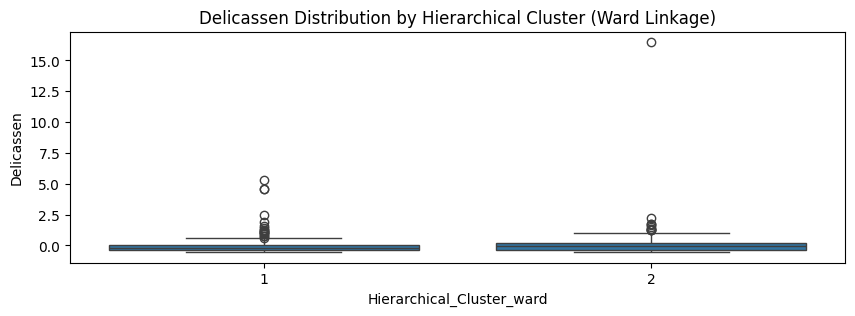

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  KMeans_Cluster_2  KMeans_Cluster_4  \
0         -0.043569   -0.066339                 1                 2   
1          0.086407    0.089151                 1                 2   
2          0.133232    2.243293                 1                 2   
3         -0.498588    0.093411                 0                 1   
4         -0.231918    1.299347                 1                 2   

   KMeans_Cluster_5  KMeans_Cluster_6  KMeans_Cluster_7  KMeans_Cluster_8  
0                 2                 1                 2                 1  
1                 2                 1                 2                 1  
2                 2                 1                 2                 1  
3                 0                 0                 1                 0  
4                 2                 1                 2                 1

In [114]:
# List of features to plot for boxplots
features = ['Channel',	'Region',	'Fresh', 	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']

# Plot box plots for Hierarchical Clustering clusters
for method in linkage_methods:
    for feature in features:
        plt.figure(figsize=(10, 3))
        sns.boxplot(x=f'Hierarchical_Cluster_{method}', y=feature, data=Wholesale_scaled_h)
        plt.title(f'{feature} Distribution by Hierarchical Cluster ({method.capitalize()} Linkage)')
        plt.show()

Wholesale_scaled.head()

## 5. Comparison and Reporting



### Step 9: Compare Effectiveness of Clustering Algorithms


Discuss which algorithm performed better for each dataset and why, considering factors such as data distribution and feature space.



In [115]:
# Davies-Bouldin Index for K-Means and Hierarchical Clustering

# Mall Dataset
db_index_mall_kmeans = davies_bouldin_score(X_mall_scaled.drop(columns=['KMeans_Cluster']), X_mall_scaled['KMeans_Cluster'])
db_index_mall_hier = davies_bouldin_score(X_mall_scaled_0.drop(columns=['hierarchical_cluster']), X_mall_scaled_0['hierarchical_cluster'])
silhouette_mall_kmeans = silhouette_score(X_mall_scaled.drop(columns=['KMeans_Cluster']), X_mall_scaled['KMeans_Cluster'])
silhouette_mall_hier = silhouette_score(X_mall_scaled_0.drop(columns=['hierarchical_cluster']), X_mall_scaled_0['hierarchical_cluster'])

# Wholesale Dataset
db_index_wholesale_kmeans = davies_bouldin_score(X_wholesale_scaled.drop(columns=['KMeans_Cluster']), X_wholesale_scaled['KMeans_Cluster'])
db_index_wholesale_hier = davies_bouldin_score(X_wholesale_scaled_0.drop(columns=['hierarchical_cluster']), X_wholesale_scaled_0['hierarchical_cluster'])
silhouette_wholesale_kmeans = silhouette_score(X_wholesale_scaled.drop(columns=['KMeans_Cluster']), X_wholesale_scaled['KMeans_Cluster'])
silhouette_wholesale_hier = silhouette_score(X_wholesale_scaled_0.drop(columns=['hierarchical_cluster']), X_wholesale_scaled_0['hierarchical_cluster'])

# Printing the Davies-Bouldin Index results
print('\n')
print(f"Davies-Bouldin Index for Mall (K-Means): {db_index_mall_kmeans}")
print(f"Davies-Bouldin Index for Mall (Hierarchical): {db_index_mall_hier}")
print('\n')
print(f"Davies-Bouldin Index for Wholesale Customers (K-Means): {db_index_wholesale_kmeans}")
print(f"Davies-Bouldin Index for Wholesale Customers (Hierarchical): {db_index_wholesale_hier}")
print('='*90)
# Printing the Silhouette Scores
print('\n')
print(f"Silhouette Score for Mall Customers (K-Means): {silhouette_mall_kmeans}")
print(f"Silhouette Score for Mall Customers (Hierarchical): {silhouette_mall_hier}")
print('\n')
print(f"Silhouette Score for Wholesale Customers (K-Means): {silhouette_wholesale_kmeans}")
print(f"Silhouette Score for Wholesale Customers (Hierarchical): {silhouette_wholesale_hier}")



Davies-Bouldin Index for Mall (K-Means): 0.9307956868103672
Davies-Bouldin Index for Mall (Hierarchical): 1.3082962894168522


Davies-Bouldin Index for Wholesale Customers (K-Means): 1.2581271885072522
Davies-Bouldin Index for Wholesale Customers (Hierarchical): 1.2849735633420112


Silhouette Score for Mall Customers (K-Means): 0.4039582785148566
Silhouette Score for Mall Customers (Hierarchical): 0.31795733680759597


Silhouette Score for Wholesale Customers (K-Means): 0.3733740311185568
Silhouette Score for Wholesale Customers (Hierarchical): 0.3680209405194812


In [116]:
# Silhouette Scores for Hierarchical Clustering in Datasets
for method in ['single', 'complete', 'average', 'ward']:
    print(f'Silhouette Score for Hierarchical Clustering ({method.capitalize()} Linkage) (Mall Customers Dataset): {silhouette_hierarchical[method]}')
print('\n')
for method in ['single', 'complete', 'average', 'ward']:
    print(f'Davies-Bouldin Index for Hierarchical Clustering ({method.capitalize()} Linkage) (Wholesale Customers Dataset): {dbi_hierarchical[method]}')


Silhouette Score for Hierarchical Clustering (Single Linkage) (Mall Customers Dataset): 0.7421298552062547
Silhouette Score for Hierarchical Clustering (Complete Linkage) (Mall Customers Dataset): 0.7421298552062547
Silhouette Score for Hierarchical Clustering (Average Linkage) (Mall Customers Dataset): 0.7421298552062547
Silhouette Score for Hierarchical Clustering (Ward Linkage) (Mall Customers Dataset): 0.39664682691354797


Davies-Bouldin Index for Hierarchical Clustering (Single Linkage) (Wholesale Customers Dataset): 0.18855554313672543
Davies-Bouldin Index for Hierarchical Clustering (Complete Linkage) (Wholesale Customers Dataset): 0.18855554313672543
Davies-Bouldin Index for Hierarchical Clustering (Average Linkage) (Wholesale Customers Dataset): 0.18855554313672543
Davies-Bouldin Index for Hierarchical Clustering (Ward Linkage) (Wholesale Customers Dataset): 1.513340788410766


### Step 10: Prepare a comprehensive Article

 This includes summarized the findings, visualizations, cluster interpretations, and a comparative analysis of the clustering techniques used.


You can find the complete Medium article here: [Clustering Techniques: A Comparative Analysis](https://medium.com/@mmoneka11/week-7-clustering-techniques-a-comparative-analysis-58bf8f322bf6).




---



---





---



---

